<center><h1>US House Pricing Prediction</h1></center>

<h3>Introduction</h3>


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

<h3>Business Problem</h3>

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

<br>

**The company wants to know:**

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

 <br>

**Business Goal**


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


<h2>Data Definition</h2>

<ul><ol>MSSubClass: Identifies the type of dwelling involved in the sale.	</ol>
<ol>MSZoning: Identifies the general zoning classification of the sale.</ol>
<ol>LotFrontage: Linear feet of street connected to property</ol>
<ol>LotArea: Lot size in square feet</ol>
<ol>Street: Type of road access to property</ol>
<ol>Alley: Type of alley access to property</ol>
<ol>LotShape: General shape of property</ol>
<ol>LandContour: Flatness of the property</ol>
<ol>Utilities: Type of utilities available</ol>
<ol>LotConfig: Lot configuration</ol>
<ol>LandSlope: Slope of property</ol>
<ol>Neighborhood: Physical locations within Ames city limits</ol>
<ol>Condition1: Proximity to various conditions</ol>
<ol>Condition2: Proximity to various conditions (if more than one is present)</ol>
<ol>BldgType: Type of dwelling</ol>
<ol>HouseStyle: Style of dwelling</ol>
<ol>OverallQual: Rates the overall material and finish of the house</ol>
<ol>OverallCond: Rates the overall condition of the house</ol>
<ol>YearBuilt: Original construction date</ol>
<ol>YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)</ol>
<ol>RoofStyle: Type of roof</ol>
<ol>RoofMatl: Roof material</ol>
<ol>Exterior1st: Exterior covering on house</ol>
<ol>Exterior2nd: Exterior covering on house (if more than one material)</ol>
<ol>MasVnrType: Masonry veneer type</ol>
<ol>MasVnrArea: Masonry veneer area in square feet</ol>
<ol>ExterQual: Evaluates the quality of the material on the exterior </ol>
<ol>ExterCond: Evaluates the present condition of the material on the exterior</ol>
<ol>Foundation: Type of foundation</ol>
<ol>BsmtQual: Evaluates the height of the basement</ol>
<ol>BsmtCond: Evaluates the general condition of the basement</ol>
<ol>BsmtExposure: Refers to walkout or garden level walls</ol>
<ol>BsmtFinType1: Rating of basement finished area</ol>
<ol>BsmtFinSF1: Type 1 finished square feet</ol>
<ol>BsmtFinType2: Rating of basement finished area (if multiple types)</ol>
<ol>BsmtFinSF2: Type 2 finished square feet</ol>
<ol>BsmtUnfSF: Unfinished square feet of basement area</ol>
<ol>TotalBsmtSF: Total square feet of basement area</ol>
<ol>Heating: Type of heating</ol>
<ol>HeatingQC: Heating quality and condition</ol>
<ol>CentralAir: Central air conditioning</ol>
<ol>Electrical: Electrical system</ol>
<ol>1stFlrSF: First Floor square feet</ol>
<ol>2ndFlrSF: Second floor square feet</ol>
<ol>LowQualFinSF: Low quality finished square feet (all floors)</ol>
<ol>GrLivArea: Above grade (ground) living area square feet</ol>
<ol>BsmtFullBath: Basement full bathrooms</ol>
<ol>BsmtHalfBath: Basement half bathrooms</ol>
<ol>FullBath: Full bathrooms above grade</ol>
<ol>HalfBath: Half baths above grade</ol>
<ol>Bedroom: Bedrooms above grade (does NOT include basement bedrooms)</ol>
<ol>Kitchen: Kitchens above grade</ol>
<ol>KitchenQual: Kitchen quality</ol>
<ol>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</ol>
<ol>Functional: Home functionality (Assume typical unless deductions are warranted)</ol>
<ol>Fireplaces: Number of fireplaces</ol>
<ol>FireplaceQu: Fireplace quality</ol>
<ol>GarageType: Garage location</ol>
<ol>GarageYrBlt: Year garage was built</ol>
<ol>GarageFinish: Interior finish of the garage</ol>
<ol>GarageCars: Size of garage in car capacity</ol>
<ol>GarageArea: Size of garage in square feet</ol>
<ol>GarageQual: Garage quality</ol>
<ol>GarageCond: Garage condition</ol>
<ol>PavedDrive: Paved driveway</ol>
<ol>WoodDeckSF: Wood deck area in square feet</ol>
<ol>OpenPorchSF: Open porch area in square feet</ol>
<ol>EnclosedPorch: Enclosed porch area in square feet</ol>
<ol>3SsnPorch: Three season porch area in square feet</ol>
<ol>ScreenPorch: Screen porch area in square feet</ol>
<ol>PoolArea: Pool area in square feet</ol>
<ol>PoolQC: Pool quality</ol>
<ol>Fence: Fence quality</ol>
<ol>MiscFeature: Miscellaneous feature not covered in other categories</ol>
<ol>MiscVal: $Value of miscellaneous feature</ol>
<ol>MoSold: Month Sold (MM)</ol>
<ol>YrSold: Year Sold (YYYY)</ol>
<ol>SaleType: Type of sale</ol>
<ol>SaleCondition: Condition of sale</ol></ul>

In [1]:
import time
start = time.time()

In [2]:
#Import Required Packages
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import math
import datetime

from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# set default plot style
sns.set_style('darkgrid')

In [3]:
# import warnings module and set ignore to hide the warning messages
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import cudf as pd
#import cupy as np

In [5]:
# read the csv dataset
df = pd.read_csv('train.csv')

In [6]:
# Preview the data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# check the shape of the dataset
df.shape

(1460, 81)

In [8]:
# view the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The dataset contains 81 features and 1460 records.

<h1> Data Cleaning<h1>

Lets starts datacleaning by droping the ID column first as it has no value to our model

In [9]:
# dropping column Id from dataframe
df.drop('Id',axis=1,inplace=True)

In [10]:
# defind a method to check null percentage of the features
def check_null_percentage(df):
    missing_info = pd.DataFrame(np.array(df.isnull().sum().sort_values(ascending=False).reset_index())\
                                ,columns=['Columns','Missing_Percentage']).query("Missing_Percentage > 0").set_index('Columns')
    return 100*missing_info/df.shape[0]

In [11]:
# view the null percentage of each feature
check_null_percentage(df)

,Missing_Percentage
Columns,
PoolQC,99.5205
MiscFeature,96.3014
Alley,93.7671
Fence,80.7534
FireplaceQu,47.2603
LotFrontage,17.7397
GarageType,5.54795
GarageCond,5.54795
GarageFinish,5.54795


The missing Percentage here means that the house doesn't have that specific feature like Gargae has 5% of all its features missing then it means that house doesn't have garage and hence 'GarageType','GarageFinish','GarageQual','GarageCond' are all have same percenntage of misiing value. These can hence be filled with "NA" because using mode will give a different meaning and won't be the right approch to fix this. SO lets proceed by will these kind of missingvalues with NA 

In [12]:
# list all the null columns
NA_columns = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',\
          'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

# fill the null values with NA
df[NA_columns] = df[NA_columns].fillna('NA')

In [13]:
# check in any rows had more than 5 na if it has more tha 5 na features willcan consider to drop them
df[df.isnull().sum(axis=1) > 5]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [14]:
# check if there are duplicated rows so if there are any we can drop them
df.duplicated(keep=False).sum()

0

There are no duplicated rows in the given data. Lets proceed with some further analyasis

To make a good prediction we need the categrical features to have a balanced or a fair ratio of labels. If a same value applies for 90% of the data set then that feature can't explain the target variable much and would product incorrect results when used in our model. So lets find the featurs which has most repetitive value.

In [15]:
# Create a method that returns a tuple that give information on the top most common value,
# its percentage and count for each feature
def top_unique_count(x):
    unq_cnt = ( x.value_counts(ascending=False,dropna=False).head(1).index.values[0],
               100 * x.value_counts(ascending=False,dropna=False).head(1).values[0]/df.shape[0],
               x.value_counts(ascending=False,dropna=False).head(1).values[0])
    return unq_cnt

In [16]:
#Assign it to a variable and provide column name once the tuble get converted to actual dataframe columns
unique_df = df.apply(lambda x: top_unique_count(x)).rename(index={0:"Value",1:'Percentage',2:'Count'})\
    .T.sort_values(by='Count',ascending=False)
unique_df.head(25)

,Value,Percentage,Count
Utilities,AllPub,99.9315,1459
Street,Pave,99.589,1454
PoolArea,0,99.5205,1453
PoolQC,NA,99.5205,1453
Condition2,Norm,98.9726,1445
3SsnPorch,0,98.3562,1436
RoofMatl,CompShg,98.2192,1434
LowQualFinSF,0,98.2192,1434
Heating,GasA,97.8082,1428
MiscVal,0,96.4384,1408


We can see that many fetatures are filled with same values in 90% of its data

In [17]:
# view the null percentage of each feature
check_null_percentage(df)

,Missing_Percentage
Columns,
LotFrontage,17.7397
GarageYrBlt,5.54795
MasVnrType,0.547945
MasVnrArea,0.547945
Electrical,0.0684932


LotFrontage has some null values which should be handled. As from my analysis we can groupby neighbourhod and LotCOnfig and view the median value of the them grouped together as Lotfrontage on each neighbourhood and LotFrontage for LotConfig are similar.

In [18]:
df['LotFrontage'] = df.groupby(['Neighborhood','LotConfig'])['LotFrontage'].\
                        apply(lambda x: np.Nan if x.median() == np.NaN else x.fillna(x.median()))
df['LotFrontage'].isnull().sum()

5

There are still some null values in LotFrontage. Okay now lets take just LotConfig and group it up and fill in the na with  median of LotFrontage as LotConfig is more relevant to LotFrontage.

In [19]:
df['LotFrontage'] = df.groupby(['LotConfig'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

Lets Analyse Garage features to determine how GarageYrBlt can be filled

In [20]:
df.loc[df.GarageYrBlt.isnull(),['GarageType','GarageCars','GarageArea','GarageFinish','GarageYrBlt','GarageQual','GarageCond']]

,GarageType,GarageCars,GarageArea,GarageFinish,GarageYrBlt,GarageQual,GarageCond
39,NA,0,0,NA,NaN,NA,NA
48,NA,0,0,NA,NaN,NA,NA
78,NA,0,0,NA,NaN,NA,NA
88,NA,0,0,NA,NaN,NA,NA
89,NA,0,0,NA,NaN,NA,NA
...,...,...,...,...,...,...,...
1349,NA,0,0,NA,NaN,NA,NA
1407,NA,0,0,NA,NaN,NA,NA
1449,NA,0,0,NA,NaN,NA,NA
1450,NA,0,0,NA,NaN,NA,NA


From inspecting the Garage data there are few homes that doesn't have agarage and hence the data are null, for categorical variables we can fill it with NA and for numerical variables if the data is based on count/measurement we can fill it with 0. For Garage Year we can't fill it with 0 but we can check if the house build year and replace it with the same. This is just my assumption as it will have some significatent corr between the columns but less on target column compartively.

Lets check the Year build column before we proceed as nul values in Yearbuild will have no effect on our approach

In [21]:
df.YearBuilt.isnull().sum()

0

In [22]:
# replacing null values of GarageYrBlt with YearBuilt
df.loc[df.GarageYrBlt.isnull(),'GarageYrBlt'] = df.loc[df.GarageYrBlt.isnull(),'YearBuilt']

Lets fill Masonry veneer Area with 0 for all the Na values and Masonry veneer Type with Not Present 

In [23]:
# fill 0 and Not Present for numerical and categorical feature's null values
df.MasVnrArea.fillna(0,inplace=True)
df.MasVnrType.fillna('Not present',inplace=True)

<h2>Creating Derived Features</h2>

In [24]:
# Adding square feet of first floor and second floor
df['TotalFlrSFAbvGrd'] = df[['1stFlrSF','2ndFlrSF']].sum(axis=1)
# Adding all the bathrooms
df['TotalBath'] = df[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']].sum(axis=1)
# Adding square feet of all Porcch
df['TotalPorchSF'] = df[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','WoodDeckSF']].sum(axis=1)

In [25]:
check_null_percentage(df)

,Missing_Percentage
Columns,
Electrical,0.0684932


In [26]:
# get the features that holds more than 90% of its data with a same value
drop_columns = unique_df.query('Percentage > 90.0').index.values
drop_columns

array(['Utilities', 'Street', 'PoolArea', 'PoolQC', 'Condition2',
       '3SsnPorch', 'RoofMatl', 'LowQualFinSF', 'Heating', 'MiscVal',
       'MiscFeature', 'KitchenAbvGr', 'LandSlope', 'BsmtHalfBath',
       'Alley', 'CentralAir', 'Functional', 'ScreenPorch', 'PavedDrive',
       'Electrical', 'GarageCond'], dtype=object)

In [27]:
# drop the columns from above analysis
df.drop(columns=drop_columns,inplace=True)
del drop_columns

In [28]:
# create a list of numerical features
numerical_features = list(df.select_dtypes(include=[np.number]).columns.values)

# create a list of features that or categorical
categorical_features = list(df.select_dtypes(include=[np.object]).columns.values)

# Creata feature list for time sereis data
timeseries_features = ['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold', 'GarageYrBlt']

In [29]:
# removing times series features from numerice to avoid repetition
for col in timeseries_features:
    numerical_features.remove(col) 

In [30]:
# adding numerical features to categrical if the unique value count in a feature is less tha are equal to 10
cat_feature = pd.Series(df[numerical_features].nunique().sort_values(),name='Count').to_frame().query('Count <= 10').index.values
categorical_features.extend(cat_feature)

In [31]:
# removing the numerical features tht belong to time series
for col in cat_feature:
    numerical_features.remove(col)

From the data we can observe that we have TotalBsmtSF and TotRmsAbvGrd which sums up the subs categories or values of the related data. Similarly we can get calculate a TotalSF for the floors and PorchSF And also calculate total number of Bathrooms

<br>
<h2>Analysing Numerical Variables</h2>

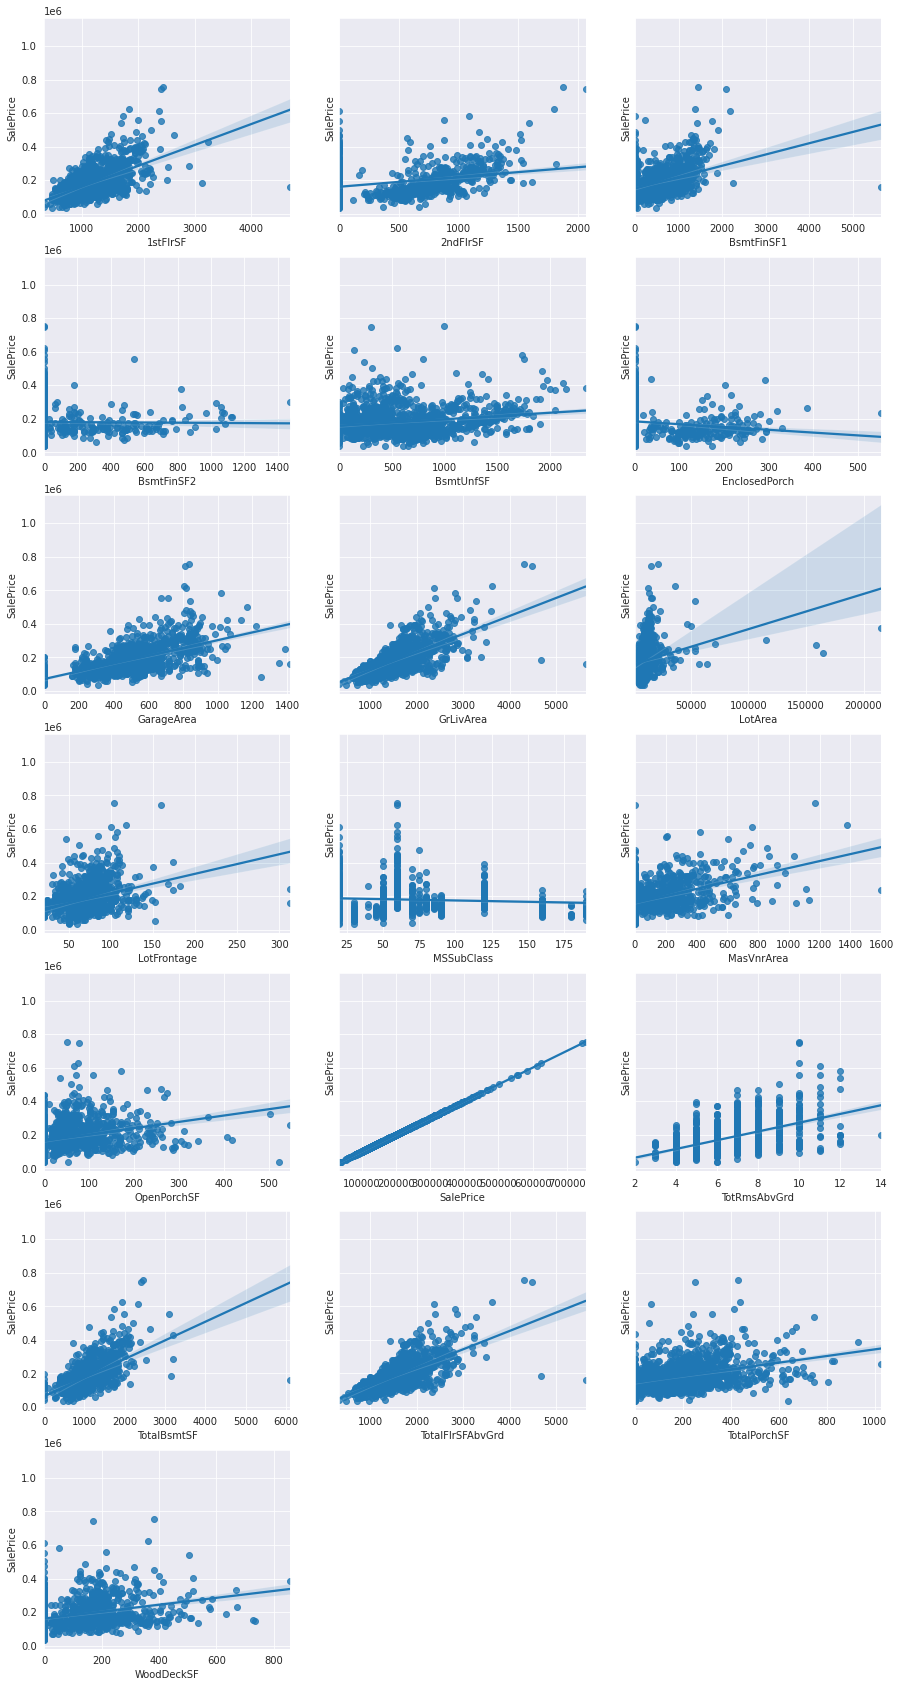

In [32]:
# define subplot columns and rows and the figure size
fig,ax = plt.subplots(math.ceil(len(numerical_features)/3),3,figsize=(15,30),sharey=True)

# initialize the row and column variable

i ,j = 0, 0
for col in sorted(numerical_features):

    # Plot a regression plot for the numerical feature and SalePrice
    sns.regplot(col,'SalePrice',data=df,ax=ax[i][j])
    if j == 2:
        j=0
        i +=1
    else:
        j +=1
        
# hide last two grids as it doesn't have any plots to show
ax[6][1].set_visible(False)
ax[6][2].set_visible(False)

<h2>Observation</h2>

Outlier and Correlation:

    1stFlrSF : It has an outlier with sqft greater than 4000 at lower price whihc is not possible to sell
    
    2ndFlrSF : is not well correlated with salePrice
    
    BsmtFinSF1 : The Sqft is greater than 5000 with lower price which is not possible
    
    BsmtFinSF2 : A outlier with sqft almost 1500 is rated at lower price which doesn't look right and is not correlated with salePrice
    
    BsmtUnfSF : The feature doesn't influence the Saleprice much
    
    EnclosedPorch : AN outlier with sqft above 500 is rated at lower price.
    
    GarageArea : There are few outliers above 1200 sqft in realtion to price
    
    GrLivArea : There are few outliers at lower price and extreme sqft
    
    LotArea : Few outliers are present above 100000 sqft
    
    LotFrontage : Two outliers are at the exterme of above 300 linear feet
    
    MasVnrArea : There is one outlier above 1500 sqft
    
    MSSubClass : This feature doesn't provide any information about salePrice
    
    OpenPorchSF : Few outliers are present above 400 sqft
    
    TotalBsmtSF : An outlier is present with sqft of about 6000


In [33]:
# define the number of outliers to be handled for each feature
feature_outlier_count = {'1stFlrSF':1,
                'BsmtFinSF1':1,
                'BsmtFinSF2':1,
                'EnclosedPorch':2,
                'GarageArea':4,
                'GrLivArea':4,
                'LotArea':4,
                'LotFrontage':2,
                'MasVnrArea':1,
                'OpenPorchSF':3,
                'TotalBsmtSF':4,
                'TotRmsAbvGrd':1,
                'TotalFlrSFAbvGrd':2,
                'TotalPorchSF':1,
                'WoodDeckSF':3}

In [34]:
# define a method to print the outlier to have a visual representation of the data with saleprice
def print_outliers(feature_list):
    for k,v in feature_list.items():
        if v:
            display(df.loc[df[k].isin(sorted(df[k])[-v:]),[k,'SalePrice']])

# returns the outlier highest value or the value specific to index when specified 
def get_outliers(feature,index=-1):
    return df.loc[df[feature] == sorted(df[feature])[index],[feature,'SalePrice']].sort_values(by=feature,ascending=False)

In [35]:
# prints the outlier for each feature
print_outliers(feature_outlier_count)

,1stFlrSF,SalePrice
1298,4692,160000


,BsmtFinSF1,SalePrice
1298,5644,160000


,BsmtFinSF2,SalePrice
322,1474,301000


,EnclosedPorch,SalePrice
197,552,235000
747,386,265979


,GarageArea,SalePrice
581,1390,253293
1061,1248,81000
1190,1356,168000
1298,1418,160000


,GrLivArea,SalePrice
523,4676,184750
691,4316,755000
1182,4476,745000
1298,5642,160000


,LotArea,SalePrice
249,159000,277000
313,215245,375000
335,164660,228950
706,115149,302000


,LotFrontage,SalePrice
934,313.0,242000
1298,313.0,160000


,MasVnrArea,SalePrice
297,1600.0,239000


,OpenPorchSF,SalePrice
495,523,34900
583,502,325000
1328,547,256000


,TotalBsmtSF,SalePrice
332,3206,284000
496,3200,430000
523,3138,184750
1298,6110,160000


,TotRmsAbvGrd,SalePrice
635,14,200000


,TotalFlrSFAbvGrd,SalePrice
523,4676,184750
1298,5642,160000


,TotalPorchSF,SalePrice
1328,1027,256000


,WoodDeckSF,SalePrice
53,857,385000
1068,728,151400
1459,736,147500


Lets drop the data in index 1298, this data doesn't seem to be wrong as this could be an exceptional record in our dataset but it lies far greater than other features and is being an outlier for the existing data so hence we need to handle it.

**This index has a huge impact on all the features deleting this record will be the best option, cause its affecting our good correlated features**

In [36]:
# Get teh index of the outlier in Feature 1stFlrSF
outlier_index = get_outliers('1stFlrSF').index.values[0]
outlier_index

1298

In [37]:
df.iloc[1298]

MSSubClass               60
MSZoning                 RL
LotFrontage             313
LotArea               63887
LotShape                IR3
                     ...   
SaleCondition       Partial
SalePrice            160000
TotalFlrSFAbvGrd       5642
TotalBath                 5
TotalPorchSF            506
Name: 1298, Length: 62, dtype: object

In [38]:
# Remove the outlier record with its index value and if the same outlier 
# is present in other features as well reduce the count in outlier_features
def remove_outlier_features_count_for_index(outlier_idx):
    for col in feature_outlier_count.keys():
        if (feature_outlier_count[col] > 0) & (outlier_index in get_outliers(col).index.values):
            feature_outlier_count[col] = feature_outlier_count[col]-1 
    df.drop(outlier_index,inplace=True)
    df.reset_index(drop=True,inplace=True)

In [39]:
remove_outlier_features_count_for_index(outlier_index)

Lets fix the outliers by getting the mean value of the feature at that SalePrice range

In [40]:
df.loc[df.index[get_outliers('TotRmsAbvGrd').index.values[0]],'TotRmsAbvGrd'] = df.loc[df['SalePrice'] == get_outliers('TotRmsAbvGrd').SalePrice.values[0],'TotRmsAbvGrd'].mode()[0]

feature_outlier_count['TotRmsAbvGrd'] = 0

In [41]:
def fix_outliers(outlier_features_list):
    for k,v in outlier_features_list.items():
        while v > 0:
            # replacing the outliers by taking mean of four closest feature value of the outlier at the salePrice Range
            replace_with = df.loc[(df['SalePrice']-get_outliers(k)['SalePrice'].values[0]).abs().argsort()[v:v+4],k].mean()
            if (df[k].dtypes == np.int64) | (df[k].dtypes == np.int32):
                df.loc[df.index[get_outliers(k).index.values[0]],k] = int(replace_with)
            else:
                df.loc[df.index[get_outliers(k).index.values[0]],k] = round(replace_with,1)        
            v = v-1
            feature_outlier_count[k] = v

In [42]:
# pass the dictionary containg all the features with number of outliers to be fixed
fix_outliers(feature_outlier_count)

Even after fixing the exterme outliers we still have some outliers that are not in extreme but or incorrect values like for larger squarefeet the salePrice is really ow which is not normal.

Lets havea  look at those missleading values

In [43]:
df[['1stFlrSF','SalePrice']].sort_values(by='1stFlrSF',ascending=False)[:3]

,1stFlrSF,SalePrice
496,3228,430000
523,3138,184750
1024,2898,287000


If we can see here the first two values of 1stFlrSF are incorrect and are at both extreme

In [44]:
df.loc[df.index[get_outliers('1stFlrSF',-2).index.values[0]],'1stFlrSF'] = df.loc[(df['SalePrice']-get_outliers('1stFlrSF',-2)['SalePrice'].values[0]).abs().argsort()[1:1+4],'1stFlrSF'].mean()

In [45]:
df[['BsmtFinSF1','SalePrice']].sort_values(by='BsmtFinSF1',ascending=False)[:3]

,BsmtFinSF1,SalePrice
523,2260,184750
898,2188,611657
1182,2096,745000


And same here in BsmtFinSF1 it has one more outlier with misleading value

In [46]:
df[['LotArea','SalePrice']].sort_values(by='LotArea',ascending=False)[:7]

,LotArea,SalePrice
451,70761,280000
1395,57200,160000
769,53504,538000
457,53227,256000
384,53107,240000
53,50271,385000
661,46589,402000


Here there are three outliers with too low values

In [47]:
#Assign the number of outliers to be fixed
feature_outlier_count['LotArea']=3
feature_outlier_count['BsmtFinSF1']=1

# call the method to fix hte outliers
fix_outliers(feature_outlier_count)

In [48]:
#Delet the variable as its not needed
del feature_outlier_count

Lets check the Regression plot on numerical variables again to see if it look better 

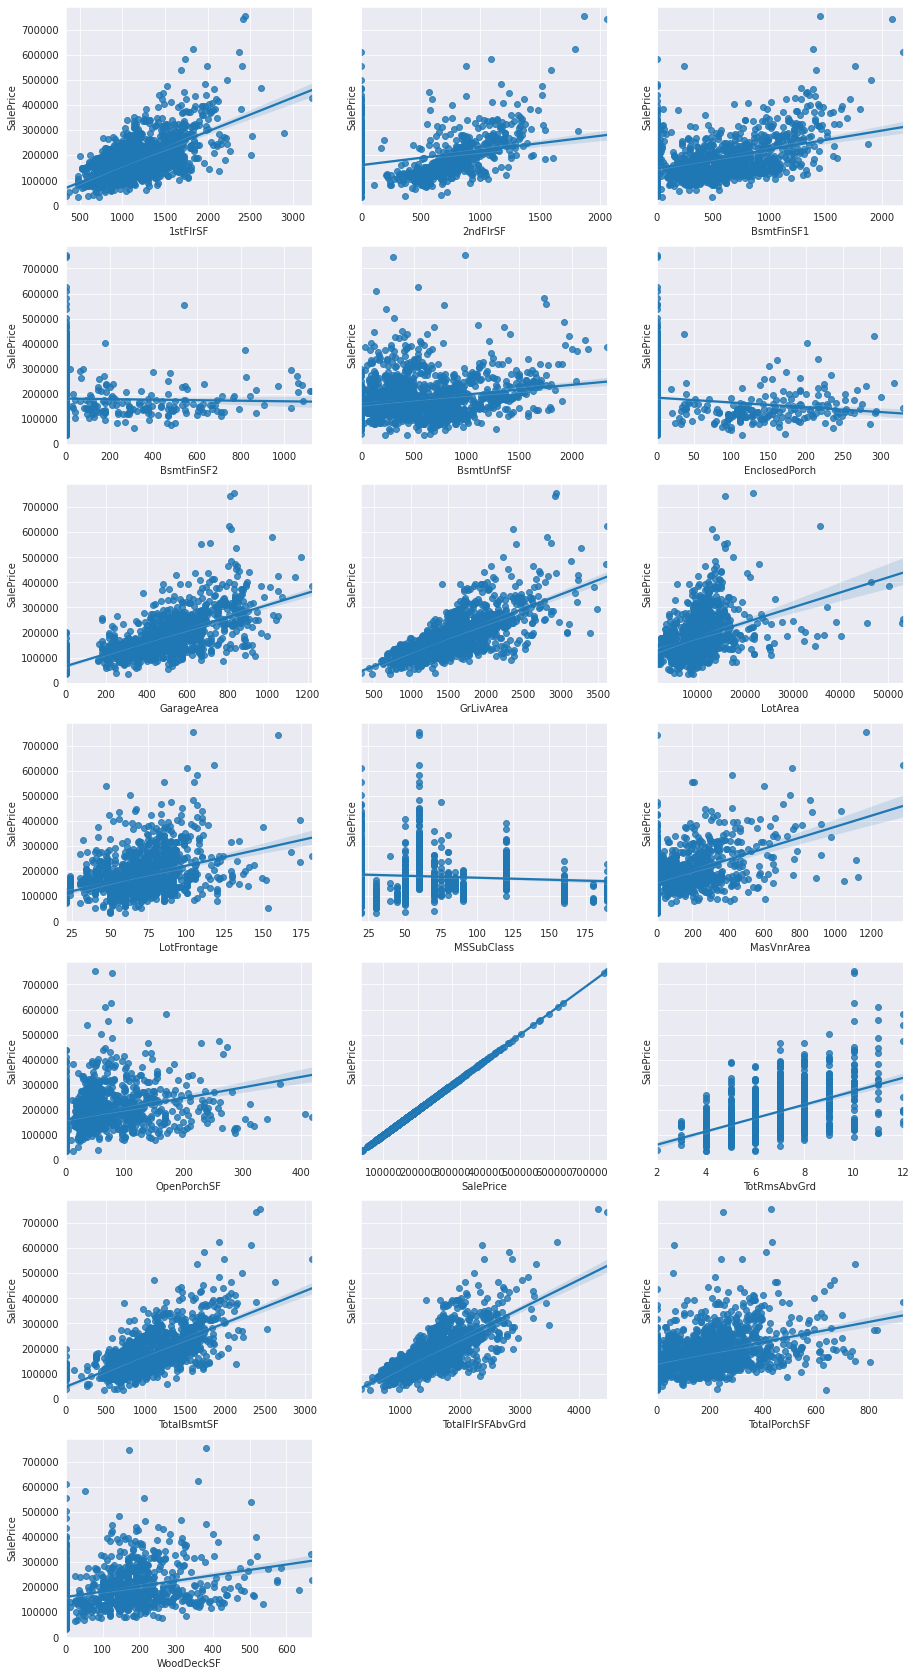

In [49]:
# define subplot columns and rows and the figure size
fig,ax = plt.subplots(math.ceil(len(numerical_features)/3),3,figsize=(15,30),sharey=True)

# initialize the row and column variable

i ,j = 0, 0
for col in sorted(numerical_features):

    # Plot a regression plot for the numerical feature and SalePrice
    sns.regplot(col,'SalePrice',data=df,ax=ax[i][j])
    if j == 2:
        j=0
        i +=1
    else:
        j +=1
        
# hide last two grids as it doesn't have any plots to show
ax[6][1].set_visible(False)
ax[6][2].set_visible(False)

Observation:

After fixing the outliers we can see the correlation better now. Lets determine which features are less correlated and drop them

    BsmtFinSF2 : It has a low correlation and hence can be dropped
    
    BsmtUnfSF : It depics less correlation towards SalePrice and hence can be dropped
    
    EnclosedPorch : Has a low and bit of negative correlation and doesn't provide much information
    
    MSSubClass : This looks like it belongs to Category variable let reassign the variable to categorical feature list
    
    

In [50]:
# drop the variables that are not in correlation with sale price
df.drop(['BsmtFinSF2','BsmtUnfSF','EnclosedPorch'],axis=1,inplace=True)
for col in ['BsmtFinSF2','BsmtUnfSF','EnclosedPorch']:
    numerical_features.remove(col)

Since MSSubClass has too many categories less reduce them to grouped label categories

In [51]:
# change the type to string 
df.MSSubClass = df.MSSubClass.astype(str)

# reducing the number of categories
df.MSSubClass.replace({'20':'1story', '30':'1story', '40':'1story', '45':'1story', '50':'1story', 
                           '60':'2story', '70':'2story', '75':'2story', '80':'nstory',
                           '85':'nstory', '90':'nstory', '120':'1story', '150':'1story',
                           '160':'2story','180':'nstory','190':'nstory'}, inplace=True)

# adding MSSubClass to catgeorical Feature list
categorical_features.append('MSSubClass')

# removing it from numerical feature list
numerical_features.remove('MSSubClass')

<br>
<h2> Analysis on Categorical Variables</h2>

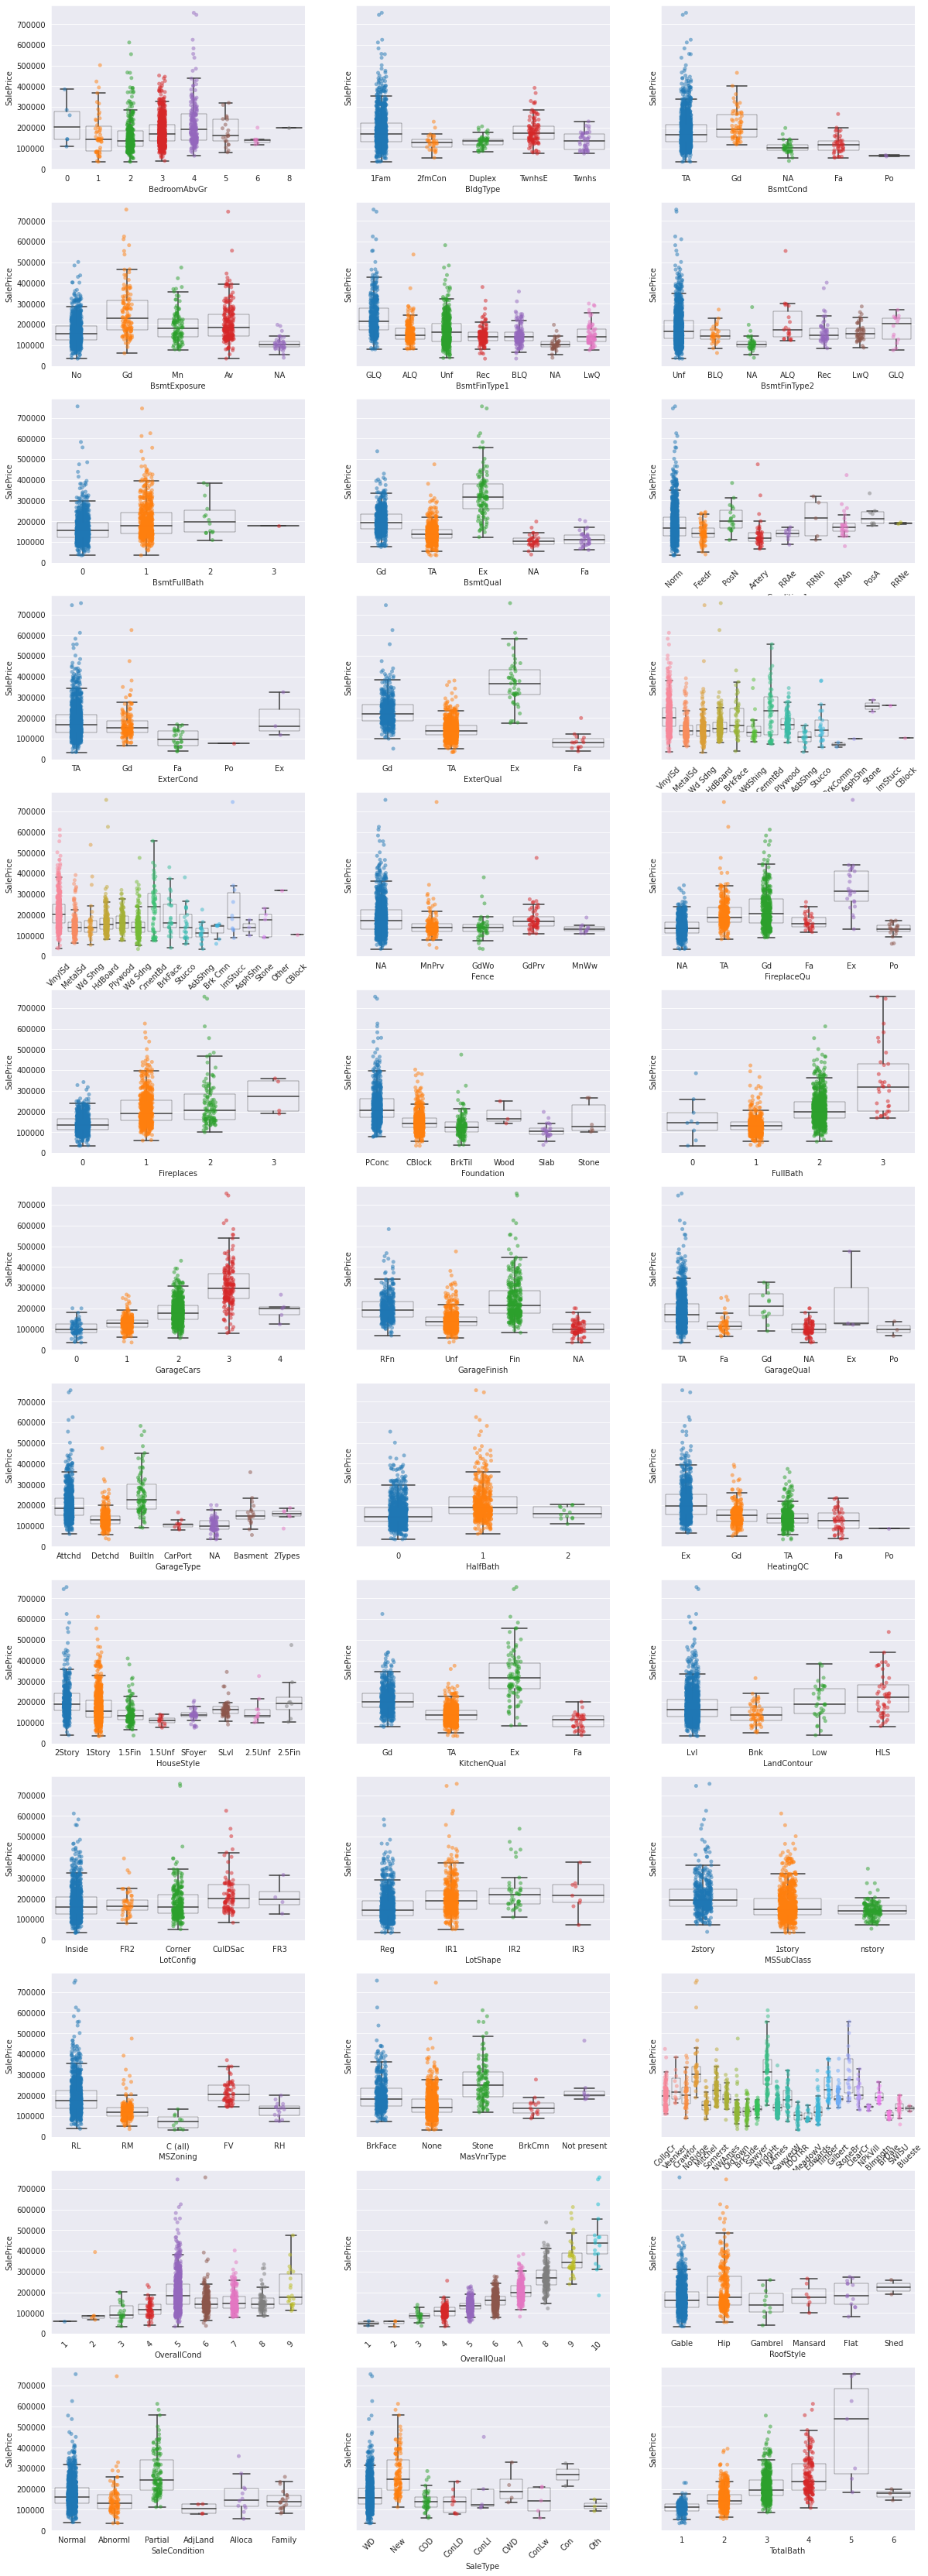

In [52]:
# define the subplots with col and row count
fig,ax = plt.subplots(math.ceil(len(categorical_features)/3),3,figsize=(20,60),sharey=True)

# initialize the row and column number
i ,j = 0, 0

# add properties to the boxplot style
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black','linewidth':0.3},
} 

for col in sorted(categorical_features):
    # plot a boxplot for SalePrice with feature
    sns.boxplot(col,'SalePrice',data=df,ax=ax[i][j],showfliers=False,**PROPS)
    
    # plot a stripplot with salePrice for the fature
    sns.stripplot(col,'SalePrice',data=df,ax=ax[i][j],alpha=0.5)
    
    # rotate the x-ticsk if the length is more
    if df[col].nunique() > 8:
        ax[i][j].tick_params(axis='x',rotation=45)
    if j == 2:
        j=0
        i +=1
    else:
        j +=1

<h2>Observation</h2>

**Combine Categories:**

    BedroomAbvGr : Combine 0 , 5 , 6 and 8
    
    BldgType : Combine 2fmCon ,Twnhs and Duplex  
    
    BsmtCond : Combine No Basement, Fa and Poor
    
    BsmtExposure : Combine Mn and Av
    
    BsmtFinType1 : Combine ALQ, Rec, BLQ and LwQ
    
    BsmtFinType2 : Combine BLQ , Rec and LwQ
    
    BsmtFullBath : Combine 2 and 3
    
    BsmtQual : Combine No Basement and Fa
    
    Condition1 : Combine RRNn and RRAn, PosN and PosA , RRNe and RRAe and Feedr and Artery
    
    Exterior2nd : Combine MetalSd, Wd Shng, HbBoard, Plywood, Wd Sdng , Stucco and combine CBlock, Other , Stone, AsphShn, ImStucc, Brk Cmn, BrkFace
    
    FireplaceQu : Combine No Fireplace, Po and Fa
    
    Foundation: Combine Wood, Slab and Stone
    
    FullBath : Combine 0 and 1
    
    GarageType: Combine Detchd, CarPort, No Garage, Basment and 2Types.
    
    GarageQual : Combine Ex and Gd , Po , Fa and No Garage
    
    HeatingQC : Combine Fa and Po
    
    House Style : Combine 2Story and 2.5Fin, SFoyer and 1.5Fin, SLvl and 1Story, 1.5Unf and 2.5Unf
    
    LotShape: Combine IR2 and IR3
    
    MSZoning : Combine RM and RH to other
    
    MasVnrType: Combine None, Not present and BrkCmn
    
    Neighborhood : combine MeadowV , BrDale and IDOTRR , Sawyer , NAmes , NPkVill , Mitchel , SWISU and Blueste , Gilbert , Blmngtn , SawyerW and NWAmes, ClearCr , CollgCr and Crawfor, Veenker, Timber and Somerst , OldTown , Edwards and BrkSide , StoneBr , NridgHt and NoRidge.
    
    OverallCond : 1, 2 and 3 , 6, 7, and 8
    
    OverallQual : 1 and 2
    
    SaleCondition: Combine AdjLand, Alloca, Family and Abnorml
    
    SaleType: Combine COD, ConLD, ConLI, CwD, ConLw, Con and Oth.
    

**Columns to Drop:**
    
    ExterCond : drop this column as mean is same for TA and Gd and other values are too less for prediction
    
    Exterior1st : The spread of data is across the price range so the correlation will be less and might not be helpful in prediction
    
    Fence : The mean is almost same for all types of fence so lets drop it
    
    LotConfig : The mean of all labels are in same range
    
    RoofStyle : Two categories has same mean with most of the datapoints
    

**Highly Correlated Features:**
    
    Fireplaces, GarageCars, HeatingQC, KitchenQual
    

<h3> Handling Nominal Categories </h2>

In [53]:
#Combine Categories that are not ordinal as ordinal catgeories 
# need to be factorized laters, hence combining nomial categorical vairables


# df.BedroomAbvGr = df.BedroomAbvGr.astype(str)
# df.BedroomAbvGr.replace({'0':'5','6':'5','8':'5'},inplace=True)
df.BldgType.replace({'2fmCon':'Twnhs','Duplex':'Twnhs'},inplace=True)
# df.BsmtCond.replace({'No Basement':'Fa','Poor':'Fa'},inplace=True)
df.BsmtExposure.replace({'Mn':'Av'},inplace=True)
# df.BsmtFinType1.replace({'ALQ':'Rec', 'BLQ':'Rec','LwQ':'Rec'},inplace=True)
# df.BsmtFinType2.replace({'BLQ':'LwQ' , 'Rec':'LwQ' },inplace=True)
# df.BsmtFullBath = df.BsmtFullBath.astype(str)
# df.BsmtFullBath.replace({'3':'2'},inplace=True)
# df.BsmtQual.replace({'No Basement' : 'Fa'},inplace=True)
df.Condition1.replace({'RRNn' : 'RRAn', 'PosN' : 'PosA' , 'RRNe' : 'RRAe' , 'Feedr' : 'Artery'},inplace=True)
df.Exterior2nd.replace({'MetalSd':'Wd Sdng', 'Wd Shng':'Wd Sdng', 'HbBoard':'Wd Sdng','Plywood':'Wd Sdng',\
                        'Stucco':'Wd Sdng' , 'CBlock': 'BrkFace','Other': 'BrkFace' , 'Stone': 'BrkFace',\
                        'AsphShn': 'BrkFace', 'ImStucc': 'BrkFace', 'Brk Cmn': 'BrkFace'},inplace=True)
# df.FireplaceQu.replace({'Po':'No Fireplace', 'Fa':'No Fireplace'},inplace=True)
df.Foundation.replace({'Wood':'Stone','Slab':'Stone'},inplace=True)
# df.FullBath = df.FullBath.astype(str)
# df.FullBath.replace({'0':'1'},inplace=True)
df.GarageType.replace({'CarPort':'Detchd', 'No Garage':'Detchd', 'Basment':'Detchd' , '2Types':'Detchd'},inplace=True)
# df.GarageQual.replace({'Ex':'NA', 'Gd':'NA' , 'Po':'NA' , 'Fa':'NA' },inplace=True)
# df.HeatingQC.replace({'Po':'Fa'},inplace=True)
# df.HouseStyle.replace({'2.5Fin':'2Story', '1.5Fin':'SFoyer', 'SLvl':'1Story', '1.5Unf': '2.5Unf'},inplace=True)
df.LotShape.replace({'IR3':'IR2'},inplace=True)
df.MSZoning.replace({'RH':'RM'},inplace=True)
df.MasVnrType.replace({'None':'BrkCmn', 'Not present':'BrkCmn'},inplace=True)
df.Neighborhood.replace({'BrDale':'MeadowV' , 'IDOTRR':'MeadowV' ,\
                         'NAmes':'Sawyer' , 'NPkVill':'Sawyer' , 'Mitchel':'Sawyer' , 'SWISU':'Sawyer', 'Blueste':'Sawyer' ,\
                         'Blmngtn':'Gilbert' , 'SawyerW':'Gilbert', 'NWAmes':'Gilbert',\
                         'ClearCr':'Crawfor' , 'CollgCr' :'Crawfor',\
                         'Timber':'Veenker', 'Somerst':'Veenker' ,\
                         'Edwards':'OldTown', 'BrkSide':'OldTown' ,\
                         'StoneBr' : 'NridgHt' , 'NoRidge': 'NridgHt'},inplace=True)
# df.OverallCond = df.OverallCond.astype(str)
# df.OverallCond.replace({'2': '3','1':'3', '6': '7', '8':'7'},inplace=True)
# df.OverallQual = df.OverallQual.astype(str)
# df.OverallQual.replace({'1':'2'},inplace=True)
df.SaleCondition.replace({'AdjLand':'Abnorml', 'Alloca':'Abnorml', 'Family' :'Abnorml'},inplace=True)
df.SaleType.replace({'ConLD':'COD', 'ConLI':'COD', 'CwD':'COD', 'ConLw':'COD', 'Con':'COD', 'Oth':'COD'},inplace=True)

dropping the categorical features that are less correlated .ie has same mean across all its labels

In [54]:
# add columns to drop
drop_columns = ['ExterCond', 'Fence', 'LotConfig' ,'RoofStyle' ,'Exterior1st']

# drop the selected features
df.drop(columns=drop_columns,inplace=True)

# remove the dropped columns from categorical feature list
for cat in drop_columns[:]:
    categorical_features.remove(cat)

<br>
<h2> Time Series Analysis</h2>

In [55]:
# list down the variables for time series
timeseries_features

['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold', 'GarageYrBlt']

In [56]:
df[timeseries_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearBuilt     1459 non-null   int64  
 1   YearRemodAdd  1459 non-null   int64  
 2   YrSold        1459 non-null   int64  
 3   MoSold        1459 non-null   int64  
 4   GarageYrBlt   1459 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 57.1 KB


In [57]:
# change the types to integer
df.YrSold = df.YrSold.astype(int)
df.GarageYrBlt = df.GarageYrBlt.astype(int)

In [58]:
# create a derieved column date sold by combining month sold and year sold
df['dateSold'] = df['MoSold'].astype(str)+'-1-'+df['YrSold'].astype(str)
df['dateSold'] =pd.to_datetime(df['dateSold'])

# add the new column to timeseries list
timeseries_features.append('dateSold')

In [59]:
# preview the new column
df['dateSold'].head()

0   2008-02-01
1   2007-05-01
2   2008-09-01
3   2006-02-01
4   2008-12-01
Name: dateSold, dtype: datetime64[ns]

In [60]:
df.loc[df.GarageYrBlt < 1900,['GarageYrBlt','YearBuilt']]

,GarageYrBlt,YearBuilt
1137,1875,1875
1348,1872,1872


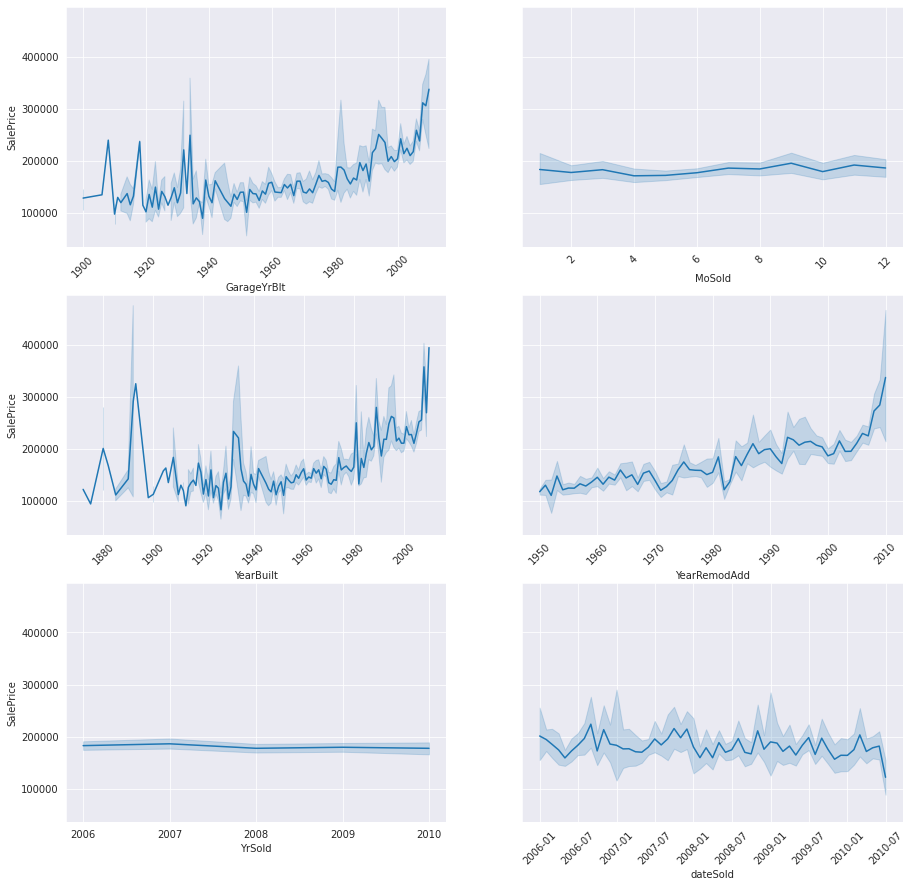

In [61]:
# define the subplot iwth number of rows and columns and the figure size accordingly
fig,ax = plt.subplots(math.ceil(len(timeseries_features)/2),2,figsize=(15,15),sharey=True)

# initialize the row and column index
i ,j = 0, 0
for col in sorted(timeseries_features):
    if col == 'GarageYrBlt':
        # create a line plot for GarageYrBlt with SalePrice for year
        # greater than 1880 as there are only two data available below this year
        sns.lineplot(df.loc[df[col] >= 1880,col],df.loc[df[col] != 0,'SalePrice'],ax=ax[i][j])
    else:
        # create a line plot for the time data with SalePrice
        sns.lineplot(col,'SalePrice',data=df,ax=ax[i][j])
    
    # if the x-ticks are more rotate the labels
    if df[col].nunique() > 8:
        ax[i][j].tick_params(axis='x',rotation=45)
    if col == "YrSold":
        ax[i][j].xaxis.set_ticks([2006,2007,2008,2009,2010])
    if j == 1:
        j=0
        i +=1
    else:
        j +=1

In [62]:
# reorder the sale price to the end for ease of visualiation in heat map
df_dummy = df.pop('SalePrice')
df.insert(df.shape[1],'SalePrice',df_dummy)
del df_dummy

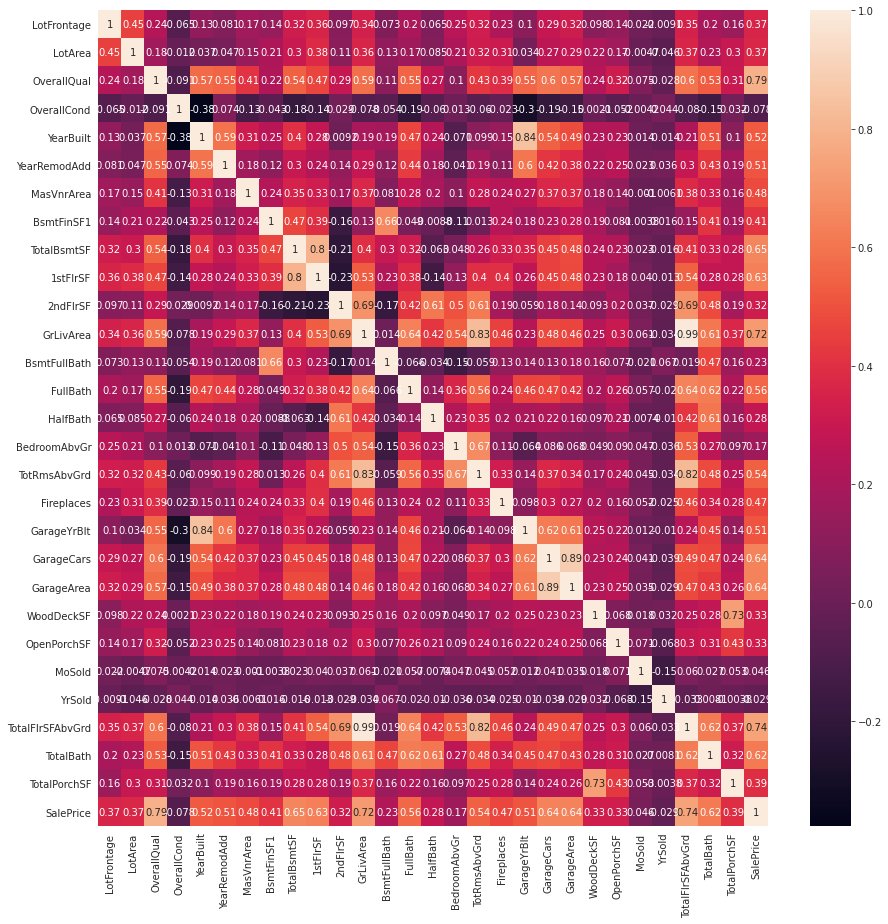

In [63]:
# set figure size
plt.figure(figsize=(15,15))

# plot correlation heatmap
sns.heatmap(df.corr(),annot=True);

In [64]:
# drop MoSold and YrSold as they are almost zero correlated
df.drop(['MoSold','YrSold'],axis=1,inplace=True)
for col in ['MoSold','YrSold']:
    timeseries_features.remove(col)

<br>
<h2> Encoding Category Labels <h2>

In [65]:
# reset these categorical numerical variables to integer 
df[['HalfBath','Fireplaces','FullBath','BsmtFullBath','GarageCars','BedroomAbvGr','OverallCond','OverallQual']] = df[['HalfBath','Fireplaces','FullBath','BsmtFullBath','GarageCars','BedroomAbvGr','OverallCond','OverallQual']].astype(int)

In [66]:
# assign the categorical columns that are non integer to categorical_columns as a list
categorical_columns =['ExterQual','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','HouseStyle','BsmtFinType2','BsmtFinType1','GarageFinish']

<h3> Manual Ordinal Data Encoding</h3>

Converting the Object category featurs to Categorical data type for encoding

In [67]:
# assign the labels in the order of decreasing to increasing as when creating a categorical feature
# Converting normal Object features to Categorical Data Type features
df['ExterQual']=pd.Categorical(df['ExterQual'],ordered=True,categories=['Fa','TA','Gd','Ex'])
df['BsmtQual']=pd.Categorical(df['BsmtQual'],ordered=True,categories=['NA','Fa','TA','Gd','Ex'])
df['BsmtCond']=pd.Categorical(df['BsmtCond'],ordered=True,categories=['NA','Po','Fa','TA','Gd'])
df['HeatingQC']=pd.Categorical(df['HeatingQC'],ordered=True,categories=['Po','Fa','TA','Gd','Ex'])
df['KitchenQual']=pd.Categorical(df['KitchenQual'],ordered=True,categories=['Fa','TA','Gd','Ex'])
df['FireplaceQu']=pd.Categorical(df['FireplaceQu'],ordered=True,categories=['NA','Po','Fa','TA','Gd','Ex'])
df['GarageQual']=pd.Categorical(df['GarageQual'],ordered=True,categories=['NA','Po','Fa','TA','Gd','Ex'])

In [68]:
df['GarageFinish'] = pd.Categorical(df['GarageFinish'],ordered=True,categories=['NA','Unf','RFn','Fin'])

In [69]:
df['BsmtFinType1']=pd.Categorical(df['BsmtFinType1'],ordered=True,categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'])
df['BsmtFinType2']=pd.Categorical(df['BsmtFinType2'],ordered=True,categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'])

In [70]:
df['HouseStyle']=pd.Categorical(df['HouseStyle'],ordered=True,categories=[ 'SFoyer','1.5Unf','1Story','1.5Fin','SLvl','2.5Unf','2Story','2.5Fin'])

**Explenation:**
<pre>Now as we have converted all these ordinal vaiables to Categorical Data Type features with ordered relation. Lets convert the labels to integers.

The integers are assigned bsaed on the order for example for lowest category it will assign zero and highest catgoery it will assign the nth position form zero.

Example: For **FireplaceQu**

['NA' < 'Po' < 'Fa' < 'TA' < 'Gd' < 'Ex'] : Categorical Data Type

[  0  <   1  <  2   <  3   <  4   <  5  ] : Integer Representation</pre>

In [71]:
# factorize the categories to Integer representation
for col in categorical_columns:
    code, _ = pd.factorize(df[col],sort=True)
    df[col] = pd.Series(code)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   MSSubClass        1459 non-null   object        
 1   MSZoning          1459 non-null   object        
 2   LotFrontage       1459 non-null   float64       
 3   LotArea           1459 non-null   int64         
 4   LotShape          1459 non-null   object        
 5   LandContour       1459 non-null   object        
 6   Neighborhood      1459 non-null   object        
 7   Condition1        1459 non-null   object        
 8   BldgType          1459 non-null   object        
 9   HouseStyle        1459 non-null   int64         
 10  OverallQual       1459 non-null   int64         
 11  OverallCond       1459 non-null   int64         
 12  YearBuilt         1459 non-null   int64         
 13  YearRemodAdd      1459 non-null   int64         
 14  Exterior2nd       1459 n

In [73]:
# reassign the categorical features 
categorical_features = list(df.select_dtypes(include=[np.object]).columns.values)

In [74]:
df.shape

(1459, 53)

We have brounght down to 53 columns finally but we still have to convert few categories to dummy variable creation

<br>
<h2> Dummy Variable Creation <h2>

Lets create dummy variables for the remaing categorical features.

As the labels in these categorical variable are shrinked to lower number the number of features generated will be less

In [75]:
# print the shape of categorical columns and the number of created dummy columns
pd.get_dummies(df[categorical_features],drop_first=True).shape,len(categorical_features)

((1459, 43), 14)

From the above column count 29 new columns will be added to our final dataFrame

In [76]:
# created dummy variables for categorical features
house_price = pd.concat([df,pd.get_dummies(df[categorical_features],drop_first=True)],axis=1)

In [77]:
# drop the actual categorical feature from list
house_price.drop(columns=categorical_features,inplace=True)

In [78]:
house_price

,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,...,BsmtExposure_NA,BsmtExposure_No,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,SaleType_CWD,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,6,7,5,2003,2003,196.0,2,3,...,0,1,0,0,0,0,0,1,1,0
1,80.0,9600,2,6,8,1976,1976,0.0,1,3,...,0,0,0,0,0,0,0,1,1,0
2,68.0,11250,6,7,5,2001,2002,162.0,2,3,...,0,0,0,0,0,0,0,1,1,0
3,60.0,9550,6,7,5,1915,1970,0.0,1,2,...,0,1,0,1,0,0,0,1,0,0
4,84.0,14260,6,8,5,2000,2000,350.0,2,3,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,62.0,7917,6,6,5,1999,2000,0.0,1,3,...,0,1,0,0,0,0,0,1,1,0
1455,85.0,13175,2,6,6,1978,1988,119.0,1,3,...,0,1,0,0,0,0,0,1,1,0
1456,66.0,9042,6,7,9,1941,2006,0.0,3,2,...,0,1,0,0,0,0,0,1,1,0
1457,68.0,9717,2,5,6,1950,1996,0.0,1,2,...,0,0,0,0,0,0,0,1,1,0


In [79]:
# reset index for the new dataframe
house_price.reset_index(drop=True,inplace=True)

<h3> Handling DATE Object </h3>

We have one more data to clean up that is our date object. For model to use dat object we need to convert it to integer. Thinking about it we have a way to conver ti to integer... Ofcourse thats unixtimestamp

In [80]:
# preview the dateSold feature
house_price.dateSold.head()

0   2008-02-01
1   2007-05-01
2   2008-09-01
3   2006-02-01
4   2008-12-01
Name: dateSold, dtype: datetime64[ns]

In [81]:
#We need time HH:MM:SS to be added to date to convert it unixtimestamp

# lets create a constant time
tm = datetime.time(10,10)

# convert the dateSold to unixstimestamp
house_price.dateSold = house_price.dateSold.apply(lambda x: datetime.datetime.combine(x, tm).timestamp())

In [82]:
house_price.dateSold.head()

0    1.201841e+09
1    1.177994e+09
2    1.220244e+09
3    1.138769e+09
4    1.228106e+09
Name: dateSold, dtype: float64

In [83]:
# reassigning all the numerical features to the numerical_features variable as a list
numerical_features = list(df.select_dtypes(include=[np.number]).columns.values)

<h1> Data Preparation </h1>
    
<h3> Our data has been cleaned and now tuned with 81 independent variables and 1 Target variable</h3>

Split the independent features and target feature to x and y respectively

In [84]:
house_price.shape

(1459, 82)

In [85]:
# extract the target fesature out from dataFrame
y = house_price.pop('SalePrice')
# assign the independent variables to x
X = house_price

# remove the target feature from numerical features before we perform scaling
numerical_features.remove('SalePrice')

Lets split the data to train and test data with sklearn liberary.

Lets defien the test size as 30% and train data size as 70%

In [86]:
# split the data to test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=0)

<h2> Feature Scaling</h2>

In [87]:
# create a StandardScaler object
scaler = StandardScaler()

# Fit and transform our train data with Standard Scaler
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# transform our test data with the same scaler object
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [88]:
X_train.head()

,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,...,BsmtExposure_NA,BsmtExposure_No,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,SaleType_CWD,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
1453,-0.393733,-0.522217,-0.748659,0.661837,-0.485974,1.084801,0.986677,-0.573037,1.064789,0.619690,...,0,1,0,0,0,0,0,1,1,0
1099,0.551285,0.340015,-0.748659,0.661837,-0.485974,0.216686,-0.334339,0.640253,-0.694353,0.619690,...,0,1,0,0,0,0,0,0,0,0
416,0.173278,-0.454499,1.401497,-0.062424,1.344947,0.216686,-0.334339,0.622583,-0.694353,-0.668912,...,0,1,0,0,0,0,0,1,1,0
1168,2.346818,0.703806,1.401497,-0.062424,1.344947,-1.219044,0.057073,-0.573037,-0.694353,-0.668912,...,0,1,0,1,0,0,0,1,1,0
670,-0.299231,-0.299179,1.401497,-0.062424,-0.485974,1.118190,0.986677,-0.573037,1.064789,0.619690,...,0,1,0,0,0,0,0,1,1,0


In [89]:
y_train.head()

1453    185000
1099    157000
416     149500
1168    235000
670     173500
Name: SalePrice, dtype: int64

<br>
<h1> Model Building </h1>

<h2>Linear Regression</h2>

Lets first build a Linear Regression model with the number of features we have to check if it overfits

In [90]:
# creating linar regressor
lr = LinearRegression()

# Initializing our model with the predictors and target features 
lr.fit(X_train,y_train)

# Predcting values in our train data set
y_train_pred = lr.predict(X_train)

print('\nIntercept:', lr.intercept_)
print('Coefficients:', lr.coef_)
print('\n\nTrain results \n')
print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Coefficient of Determination (R2): {:.2f}'.format(r2_score(y_train, y_train_pred)))
print('Residual Sum of Squares (RSS): {:.2f}'.format(np.sum(np.square(y_train - y_train_pred))))

# Predicting values for our test data
y_test_pred = lr.predict(X_test)
print('\n\nTest results \n')
print('Test Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Test Coefficient of Determination (R2): {:.2f}'.format(r2_score(y_test, y_test_pred)))
print('Test Residual Sum of Squares (RSS): {:.2f} \n'.format(np.sum(np.square(y_test - y_test_pred))))


Intercept: 159168.28257076984
Coefficients: [ 9.21497936e+02  4.31887927e+03 -3.03660228e+02  1.35361661e+04
  7.70044959e+03  8.60097568e+02 -1.17923181e+03  7.05389147e+03
  2.29363121e+03  5.23467824e+03 -2.58585957e+03  9.63739620e+02
  6.46746302e+03 -1.79240145e+02  1.07725865e+04  1.13196504e+03
 -6.14778844e+04 -7.41396711e+04 -4.20931685e+04  2.54324064e+03
  2.12042928e+03  2.27992031e+03 -5.73897026e+03  4.75684924e+03
  6.12595215e+03  3.67299138e+03 -3.29713401e+03  1.47757636e+03
  9.66580819e+02  1.63646748e+03  4.23974920e+03  5.25940265e+03
  8.29214434e+02 -1.01959765e+02  1.53148633e+05 -1.22953630e+03
  1.26430930e+03 -1.18674670e-05 -2.94673434e+03 -2.58058695e+03
  2.90316177e+04  1.72897034e+04  1.60699706e+04  1.19741450e+04
  8.91269758e+00 -3.02472487e+02 -1.50891812e+04 -4.90583730e+03
 -3.41804828e+03  7.59074639e+02  3.24191473e+04 -6.42880719e+03
 -5.17251922e+03  4.88605996e+02  8.27531981e+03  5.18008978e+02
 -1.48715357e+04  9.26141536e+03 -2.02164973e

Lets calculate and store the outputs in a metric variable

In [91]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

# initialize a list
metric = []

# calcuate R2 Score for Training data
metric.append(r2_score(y_train, y_train_pred))

# calculate R2 Score for Test data
metric.append(r2_score(y_test, y_test_pred))

# calcuate RSS for Train Data
metric.append(np.sum(np.square(y_train - y_train_pred)))

# calcuate RSS for Test Data
metric.append(np.sum(np.square(y_test - y_test_pred)))

# calcuate MSE for Train Data
metric.append(mean_squared_error(y_train, y_train_pred)**0.5)

# calcuate MSE for Test Data
metric.append(mean_squared_error(y_test, y_test_pred)**0.5)

# add number of features for the model
metric.append(len(X_train.columns))

# add the alpha value if present
metric.append(0)

<h3>Observation:</h3>

    Our model output has higher R2 score in train data and lower R2 score in test data with a huge difference. Hence it clearly **overfits**.
    
    There are several ways to overcome this problem:
        - reduce the number of features to has the model simple(less complex) using RFE
        - Ridge regression can reduce the coeff values a lot and use the hyper parameter(alpha) to tune the model
        - Use Lasso regression to reduce the improve the model best fit by reducing the coeff to zero to reject the features, this helps in selceting the features for out model with teh use of hyper parameter

<H2> Feature Selection</H2>
<h3> Analysis the Correlated Features </h3>

Before we use RFE lets analyse the top correlated features

In [92]:
# perform correlation on the train data set for the predictor
correlation_df = pd.concat([X_train,y_train],axis=1)

In [93]:
# Creating a method to get the top correlated features
def get_top_corr_features():
    # creating a correlation list for the top features with SalesPrice
    corr_cols = correlation_df.corr().loc[:,'SalePrice'].sort_values(ascending=False)
    corr_cols = corr_cols.reset_index()
    # order the data with positive corr first and negative corr last
    corr_cols = corr_cols[corr_cols.SalePrice>0].append(corr_cols[corr_cols.SalePrice<0])
    return corr_cols

In [94]:
# get teh top 30 +ve corelation appended with top 25 most +ve corr freature and lastly the reaming features
corr_cols = get_top_corr_features().head(30).append(get_top_corr_features().tail(25).sort_values('SalePrice',ascending=True)).append(get_top_corr_features().iloc[30:57])[1:].reset_index(drop=True)
# rename columns
corr_cols.columns = ['Corr Feature','SalePrice Corr']
# preview the result
corr_cols[corr_cols['Corr Feature'].isin(['2ndFlrSF',
 'Condition1_PosA',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CmentBd',
 'Exterior2nd_VinylSd',
 'LotShape_IR2',
 'MSZoning_FV',
 'SaleCondition_Partial',
 'SaleType_CWD'])]

,Corr Feature,SalePrice Corr
26,SaleCondition_Partial,0.373156
28,2ndFlrSF,0.354138
60,Exterior2nd_VinylSd,0.303370
72,Exterior2nd_CmentBd,0.131511
73,LotShape_IR2,0.122038
75,MSZoning_FV,0.075271
76,Condition1_PosA,0.057915
78,SaleType_CWD,0.049952
80,Exterior2nd_BrkFace,0.038597


<h2>RFE</h2>

In [95]:
# Reordering the columns based on correlation so when performing RFE build by adding feature on by one noise features will be added only at the end
X_train = X_train[corr_cols['Corr Feature']]
X_test = X_test[corr_cols['Corr Feature']]

Reducing the number of features to 50 using RFE

In [96]:
# create a Linear model for RFE
lm_rfe = LinearRegression()

# fit the train and test data to linaer model
lm_rfe.fit(X_train,y_train)

# create RFE for our Linear Regressor Model and reduce to 50 features
rfe = RFE(lm_rfe,50)

# fit the train and test data to RFE
rfe = rfe.fit(X_train,y_train)

RFE gives a rank with number , the number that are greater than one can be dropped. The selected columns shows true to retain and false to reject.

In [97]:
# print the rank of each features
pd.DataFrame(zip(X_train.columns,rfe.support_,rfe.ranking_),columns=['Feature','Selected','Rank']).sort_values('Rank')

,Feature,Selected,Rank
0,OverallQual,True,1
32,Exterior2nd_Wd Sdng,True,1
33,MSZoning_RM,True,1
34,Neighborhood_Sawyer,True,1
38,GarageType_NA,True,1
...,...,...,...
77,LandContour_HLS,False,28
50,BsmtFinType2,False,29
56,OpenPorchSF,False,30
35,LotShape_Reg,False,31


In [98]:
# lets extract the top 50 selected columns by RFE
rfe_selected_columns = X_train.columns[rfe.support_]

In [99]:
# Top 50 correlated feature list
corr_selected_columns = get_top_corr_features().head(25).append(get_top_corr_features().tail(25).sort_values('SalePrice',ascending=True))[1:].reset_index(drop=True)
# rename the columns
corr_selected_columns.columns = ['Corr_feature','SalePrice_Corr']

In [100]:
# Sort the DataFrame based on the column name
corr_selected_columns = corr_selected_columns.sort_values(by='Corr_feature').reset_index(drop=True)
# Sort the Sereis based on the feature name
rfe_selected_columns = pd.Series(sorted(rfe_selected_columns),name='RFE')
# make a inner join and merge to get the common features
corr_rfe_features = pd.merge(left=rfe_selected_columns,right=corr_selected_columns,how='inner',\
                             left_on='RFE',right_on='Corr_feature').sort_values(by='SalePrice_Corr',ascending=False).reset_index(drop=True)

In [101]:
corr_rfe_features

,RFE,Corr_feature,SalePrice_Corr
0,OverallQual,OverallQual,0.780560
1,TotalFlrSFAbvGrd,TotalFlrSFAbvGrd,0.753369
2,GrLivArea,GrLivArea,0.720807
3,KitchenQual,KitchenQual,0.663362
4,ExterQual,ExterQual,0.661228
5,GarageArea,GarageArea,0.652569
6,TotalBsmtSF,TotalBsmtSF,0.641573
7,1stFlrSF,1stFlrSF,0.629683
8,BsmtQual,BsmtQual,0.622210
9,Neighborhood_NridgHt,Neighborhood_NridgHt,0.592287


<h3>OLS Model</h3>

In [102]:
# this function can be resued to build ols model for given features
def build_model(X_train_rfe):
    # adding a constant variable for intercept
    X_train_rfe = sm.add_constant(X_train_rfe)

    # Initialize an OLS model for our dataset and fit the data to model
    lm = sm.OLS(y_train,X_train_rfe).fit()

    # view the summary of the model for selected features
    print(lm.summary())

    return lm

<h3> VIF Analysis </h3>

The VIF score should be below 5 for an ideal model.

In [103]:
def VIF(X_train_rfe):
    # create a dummy dataframe
    vif = pd.DataFrame(columns=['Features','VIF'])
    
    # extract the column values to vif features column value
    vif['Features'] = X_train_rfe.columns

    # calculate vif for the train data for the added features
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    
    # round the value to 2 decimals
    vif['VIF'] = round(vif['VIF'], 2)
    
    # sort values by hightevif value first
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # print vif table
    display(vif)
    
    # retrun vif object
    return vif

We have two way to build a model to find the best features selected by RFE that would fit.
<ul><li>Dropping a feature one by one from the model built with 50 features until it shows good performane without overfitting</li><li>Adding a feature one by one to the model until it shows a good performance metrics</li></ul>

Lets add features one by one and build our model

Lets create a custom logic based on the below condition

<table>
<tr><th style="text-align:center">Order</th><th style="text-align:center">P-value</th><th style="text-align:center">VIF</th><th style="text-align:center">Action</th></tr>
<tr><td>1</td><td>High</td><td>High</td><td>Drop these columns First</td></tr>
<tr><td>2</td><td>High</td><td>Low</td><td>Drop these columns one by one, because this could lower the VIF values of other columns to prevent it from being dropped in next step </td></tr>
<tr><td>3</td><td>Low</td><td>High</td><td>Drop the colums with VIF greater than 5</td></tr>
<tr><td>4</td><td>Low</td><td>Low</td><td>Keep these features</td></tr>
</table>	

In [104]:
def perform_feature_selection(train_data,rfe=False,corr=False):
    # create a empty data frame for xtrain and vif
    X_train_rfe = pd.DataFrame()
    vif = pd.DataFrame()

    # creating this object to ignore vif for a single feature
    count = 1

    # created this varible to stop the outer loop of adding futher features for model
    stop = False

    # prev r2score
    r2score = 0.0

    # fetch the features based on corr/rfe selection
    if rfe:
        cols = rfe_selected_columns
    elif corr:
        cols = corr_selected_columns.Corr_feature
    else: 
        cols = corr_rfe_features.RFE.values
        
    for col in cols:
    #for v in rfe_selected_columns:

        # add the column to the traing data set
        if col in train_data.columns.values:
            X_train_rfe[col] = train_data[col]

            # rebuild the model again to ckeck for high vifs and p-values 
            # once a feature is dropped on the above conditions after adding 
            # the new feature from the previous step to the model
            while True:
                # build the model
                lm = build_model(X_train_rfe)

                # Drop the previous column if r2score doesn't increase
                if round(r2score,3) == round(lm.rsquared,3):

                    print("\n\n Dropping "+X_train_rfe.columns.values[-1]+" and rebuilding the model as it did not add any info to model \n\n")

                    X_train_rfe.drop(X_train_rfe.columns.values[-1],axis=1, inplace=True)
                    
                    # build the model again as we have removed a feature 
                    lm = build_model(X_train_rfe)

                # Assign new r2score to check for the next build on adding new feature
                r2score = lm.rsquared

                # ignore vif and p-value check since there will
                # be only 1 column on first iteration
                if count != 1:

                    # calculate VIF
                    vif = VIF(X_train_rfe)

                    # if the model reaches required r2 score stop the model from executing furher steps
                    if lm.rsquared >= 0.90:
                        stop = True
                        break

                    # Check if the p-value if high
                    if (lm.pvalues > 0.05).sum() > 0:

                        # extract feature fo high p-value
                        feature = lm.pvalues[lm.pvalues > 0.05].index

                        # check if this feature is not const
                        if feature[0] != 'const':

                            # if the VIF value is aslo high drop this columns first
                            if feature[0] in vif.loc[vif.VIF > 5,'Features']:
                                X_train_rfe.drop(feature[0],axis=1,inplace=True)                # order 1
                            else:
                                # if only the p-value is high drop it
                                X_train_rfe.drop(feature[0],axis=1,inplace=True)                # order 2

                        # if the p-value column is 2nd in the list extract 
                        # that feature name to drop if from dataset if there is 
                        # a third value with high p-value it will be
                        # validated in the next loop after rebuild on dropping the current feature
                        elif (feature[0] == 'const') & (len(feature) > 1):
                            X_train_rfe.drop(feature[1],axis=1,inplace=True)                    # order 2

                    # if VIF value is high drop it
                    if ((vif.VIF > 5).sum() > 0) & (col in X_train_rfe.columns.values):
                        X_train_rfe.drop(col,axis=1,inplace=True)   # order 3
                    else:
                        break                                                                   # order 4
                else:
                    break
            # stop the process
            if stop:
                break

            # increment count on adding new feature
            count = count + 1
            
    return X_train_rfe

In [105]:
X_train_rfe = perform_feature_selection(X_train,corr=True)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     669.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          7.12e-114
Time:                        11:53:06   Log-Likelihood:                -12738.
No. Observations:                1021   AIC:                         2.548e+04
Df Residuals:                    1019   BIC:                         2.549e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.822e+05   1985.889     91.743      0.0

,Features,VIF
0,1stFlrSF,1.0
1,BldgType_Twnhs,1.0


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     246.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          3.82e-120
Time:                        11:53:06   Log-Likelihood:                -12717.
No. Observations:                1021   AIC:                         2.544e+04
Df Residuals:                    1017   BIC:                         2.546e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.859e+05   2115.946     

,Features,VIF
0,1stFlrSF,1.0
1,BldgType_Twnhs,1.0


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     259.1
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          7.02e-125
Time:                        11:53:06   Log-Likelihood:                -12706.
No. Observations:                1021   AIC:                         2.542e+04
Df Residuals:                    1017   BIC:                         2.544e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.867e+05   2011.510     

,Features,VIF
1,BldgType_Twnhs,1.06
2,BsmtExposure_NA,1.06
0,1stFlrSF,1.00


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     209.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          5.25e-131
Time:                        11:53:06   Log-Likelihood:                -12689.
No. Observations:                1021   AIC:                         2.539e+04
Df Residuals:                    1016   BIC:                         2.541e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.035e+05   3477.869     

,Features,VIF
1,BldgType_Twnhs,1.10
2,BsmtExposure_NA,1.06
3,BsmtExposure_No,1.06
0,1stFlrSF,1.02


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     179.7
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          4.97e-137
Time:                        11:53:06   Log-Likelihood:                -12672.
No. Observations:                1021   AIC:                         2.536e+04
Df Residuals:                    1015   BIC:                         2.539e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.998e+05   3481.406     

,Features,VIF
4,BsmtFinSF1,1.26
0,1stFlrSF,1.23
1,BldgType_Twnhs,1.10
2,BsmtExposure_NA,1.09
3,BsmtExposure_No,1.07


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     153.0
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          3.12e-138
Time:                        11:53:06   Log-Likelihood:                -12667.
No. Observations:                1021   AIC:                         2.535e+04
Df Residuals:                    1014   BIC:                         2.538e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.009e+05   3480.419     

,Features,VIF
4,BsmtFinSF1,1.26
0,1stFlrSF,1.23
2,BsmtExposure_NA,1.14
1,BldgType_Twnhs,1.10
3,BsmtExposure_No,1.07
5,BsmtFinType2,1.05


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     250.2
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          8.00e-216
Time:                        11:53:06   Log-Likelihood:                -12483.
No. Observations:                1021   AIC:                         2.498e+04
Df Residuals:                    1013   BIC:                         2.502e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.866e+05   2989.180     

,Features,VIF
6,BsmtQual,1.52
2,BsmtExposure_NA,1.47
0,1stFlrSF,1.32
4,BsmtFinSF1,1.29
1,BldgType_Twnhs,1.11
3,BsmtExposure_No,1.07
5,BsmtFinType2,1.06


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     250.7
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          4.36e-216
Time:                        11:53:06   Log-Likelihood:                -12483.
No. Observations:                1021   AIC:                         2.498e+04
Df Residuals:                    1013   BIC:                         2.502e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.826e+05   1639.205    1

,Features,VIF
5,BsmtQual,1.52
2,BsmtExposure_NA,1.46
0,1stFlrSF,1.31
3,BsmtFinSF1,1.28
1,BldgType_Twnhs,1.07
4,BsmtFinType2,1.06


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     290.2
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          4.37e-216
Time:                        11:53:06   Log-Likelihood:                -12486.
No. Observations:                1021   AIC:                         2.499e+04
Df Residuals:                    1014   BIC:                         2.502e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             1.82e+05   1651.922    1

,Features,VIF
4,BsmtQual,1.52
2,BsmtExposure_NA,1.38
0,1stFlrSF,1.30
3,BsmtFinSF1,1.27
1,BldgType_Twnhs,1.07
5,Condition1_RRAn,1.00


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     373.7
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          7.82e-253
Time:                        11:53:06   Log-Likelihood:                -12400.
No. Observations:                1021   AIC:                         2.481e+04
Df Residuals:                    1014   BIC:                         2.485e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.827e+05   1504.274    1

,Features,VIF
4,BsmtQual,2.38
5,ExterQual,1.84
2,BsmtExposure_NA,1.47
0,1stFlrSF,1.36
3,BsmtFinSF1,1.28
1,BldgType_Twnhs,1.07


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     320.1
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          1.52e-251
Time:                        11:53:06   Log-Likelihood:                -12400.
No. Observations:                1021   AIC:                         2.482e+04
Df Residuals:                    1013   BIC:                         2.486e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.828e+05   1

,Features,VIF
4,BsmtQual,2.38
5,ExterQual,1.84
2,BsmtExposure_NA,1.47
0,1stFlrSF,1.36
3,BsmtFinSF1,1.28
1,BldgType_Twnhs,1.07


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     320.8
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          6.72e-252
Time:                        11:53:06   Log-Likelihood:                -12399.
No. Observations:                1021   AIC:                         2.481e+04
Df Residuals:                    1013   BIC:                         2.485e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.845e+05   2

,Features,VIF
4,BsmtQual,2.38
5,ExterQual,1.84
2,BsmtExposure_NA,1.47
0,1stFlrSF,1.36
3,BsmtFinSF1,1.28
1,BldgType_Twnhs,1.07


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     351.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          4.51e-266
Time:                        11:53:06   Log-Likelihood:                -12366.
No. Observations:                1021   AIC:                         2.475e+04
Df Residuals:                    1013   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.823e+05   1456.782    1

,Features,VIF
4,BsmtQual,2.42
5,ExterQual,1.86
0,1stFlrSF,1.49
2,BsmtExposure_NA,1.48
6,FireplaceQu,1.32
3,BsmtFinSF1,1.28
1,BldgType_Twnhs,1.10


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     313.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          5.84e-268
Time:                        11:53:06   Log-Likelihood:                -12359.
No. Observations:                1021   AIC:                         2.474e+04
Df Residuals:                    1012   BIC:                         2.478e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.821e+05   1447.307    1

,Features,VIF
6,FireplaceQu,4.35
7,Fireplaces,4.11
4,BsmtQual,2.45
5,ExterQual,1.87
0,1stFlrSF,1.50
2,BsmtExposure_NA,1.48
3,BsmtFinSF1,1.33
1,BldgType_Twnhs,1.10


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     319.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          6.16e-271
Time:                        11:53:06   Log-Likelihood:                -12352.
No. Observations:                1021   AIC:                         2.472e+04
Df Residuals:                    1012   BIC:                         2.477e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.88e+05   2053.30

,Features,VIF
4,BsmtQual,2.42
5,ExterQual,1.93
0,1stFlrSF,1.49
2,BsmtExposure_NA,1.48
3,BsmtFinSF1,1.32
6,Fireplaces,1.26
7,Foundation_CBlock,1.24
1,BldgType_Twnhs,1.15


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     284.3
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          8.49e-270
Time:                        11:53:06   Log-Likelihood:                -12352.
No. Observations:                1021   AIC:                         2.472e+04
Df Residuals:                    1011   BIC:                         2.477e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.85e+05   4368.64

,Features,VIF
4,BsmtQual,2.42
5,ExterQual,1.93
0,1stFlrSF,1.49
2,BsmtExposure_NA,1.48
3,BsmtFinSF1,1.32
6,Fireplaces,1.26
7,Foundation_CBlock,1.24
1,BldgType_Twnhs,1.15


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     284.1
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          1.10e-269
Time:                        11:53:06   Log-Likelihood:                -12352.
No. Observations:                1021   AIC:                         2.472e+04
Df Residuals:                    1011   BIC:                         2.477e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.879e+05   2080.55

,Features,VIF
4,BsmtQual,2.42
5,ExterQual,1.93
0,1stFlrSF,1.49
2,BsmtExposure_NA,1.48
3,BsmtFinSF1,1.32
6,Fireplaces,1.26
7,Foundation_CBlock,1.24
1,BldgType_Twnhs,1.15


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     321.1
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          3.27e-289
Time:                        11:53:06   Log-Likelihood:                -12307.
No. Observations:                1021   AIC:                         2.463e+04
Df Residuals:                    1011   BIC:                         2.468e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.871e+05   1966.95

,Features,VIF
4,BsmtQual,2.60
5,ExterQual,1.99
8,FullBath,1.67
0,1stFlrSF,1.57
2,BsmtExposure_NA,1.51
3,BsmtFinSF1,1.35
7,Foundation_CBlock,1.29
6,Fireplaces,1.27
1,BldgType_Twnhs,1.23


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     356.3
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          2.57e-306
Time:                        11:53:06   Log-Likelihood:                -12267.
No. Observations:                1021   AIC:                         2.455e+04
Df Residuals:                    1011   BIC:                         2.460e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.872e+05   1819.70

,Features,VIF
4,ExterQual,2.02
3,BsmtQual,1.91
8,GarageArea,1.69
0,1stFlrSF,1.67
7,FullBath,1.67
2,BsmtFinSF1,1.37
5,Fireplaces,1.28
6,Foundation_CBlock,1.28
1,BldgType_Twnhs,1.20


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     320.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          4.98e-305
Time:                        11:53:06   Log-Likelihood:                -12267.
No. Observations:                1021   AIC:                         2.456e+04
Df Residuals:                    1010   BIC:                         2.461e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.872e+05   1821.62

,Features,VIF
4,ExterQual,2.02
3,BsmtQual,1.91
8,GarageArea,1.69
0,1stFlrSF,1.67
7,FullBath,1.67
2,BsmtFinSF1,1.37
5,Fireplaces,1.28
6,Foundation_CBlock,1.28
1,BldgType_Twnhs,1.20


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     320.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          4.91e-305
Time:                        11:53:06   Log-Likelihood:                -12267.
No. Observations:                1021   AIC:                         2.456e+04
Df Residuals:                    1010   BIC:                         2.461e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.871e+05   1821.42

,Features,VIF
4,ExterQual,2.02
3,BsmtQual,1.91
8,GarageArea,1.69
0,1stFlrSF,1.67
7,FullBath,1.67
2,BsmtFinSF1,1.37
5,Fireplaces,1.28
6,Foundation_CBlock,1.28
1,BldgType_Twnhs,1.20


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     320.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          4.07e-305
Time:                        11:53:06   Log-Likelihood:                -12266.
No. Observations:                1021   AIC:                         2.455e+04
Df Residuals:                    1010   BIC:                         2.461e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.878e+05   2106.65

,Features,VIF
4,ExterQual,2.02
3,BsmtQual,1.91
8,GarageArea,1.69
0,1stFlrSF,1.67
7,FullBath,1.67
2,BsmtFinSF1,1.37
5,Fireplaces,1.28
6,Foundation_CBlock,1.28
1,BldgType_Twnhs,1.20


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     325.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          1.33e-307
Time:                        11:53:06   Log-Likelihood:                -12261.
No. Observations:                1021   AIC:                         2.454e+04
Df Residuals:                    1010   BIC:                         2.460e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.858e+05   1852.33

,Features,VIF
8,GarageArea,2.24
4,ExterQual,2.02
3,BsmtQual,1.93
0,1stFlrSF,1.70
7,FullBath,1.68
9,GarageType_NA,1.47
2,BsmtFinSF1,1.37
5,Fireplaces,1.29
6,Foundation_CBlock,1.29
1,BldgType_Twnhs,1.24


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     298.8
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          3.26e-308
Time:                        11:53:06   Log-Likelihood:                -12256.
No. Observations:                1021   AIC:                         2.454e+04
Df Residuals:                    1009   BIC:                         2.460e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.859e+05   1845.73

,Features,VIF
8,GarageArea,2.50
10,GarageYrBlt,2.35
3,BsmtQual,2.23
4,ExterQual,2.10
0,1stFlrSF,1.72
7,FullBath,1.72
9,GarageType_NA,1.48
2,BsmtFinSF1,1.37
5,Fireplaces,1.31
6,Foundation_CBlock,1.29


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     370.1
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:06   Log-Likelihood:                -12134.
No. Observations:                1021   AIC:                         2.429e+04
Df Residuals:                    1008   BIC:                         2.436e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.848e+05   1640.05

,Features,VIF
8,GarageArea,2.71
11,GrLivArea,2.59
10,GarageYrBlt,2.57
7,FullBath,2.29
3,BsmtQual,2.25
4,ExterQual,2.10
0,1stFlrSF,1.81
9,GarageType_NA,1.49
5,Fireplaces,1.44
2,BsmtFinSF1,1.38


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:06   Log-Likelihood:                -12131.
No. Observations:                1021   AIC:                         2.429e+04
Df Residuals:                    1008   BIC:                         2.435e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.831e+05   1179.345    155.

,Features,VIF
7,GarageArea,2.72
9,GarageYrBlt,2.70
10,GrLivArea,2.59
6,FullBath,2.26
3,BsmtQual,2.25
4,ExterQual,2.20
0,1stFlrSF,1.80
11,HeatingQC,1.52
8,GarageType_NA,1.48
5,Fireplaces,1.42


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     390.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:06   Log-Likelihood:                -12111.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                    1008   BIC:                         2.431e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.828e+05   1155.016    158.

,Features,VIF
4,ExterQual,2.73
6,GarageArea,2.72
8,GarageYrBlt,2.53
11,KitchenQual,2.49
3,BsmtQual,2.24
9,GrLivArea,1.94
0,1stFlrSF,1.80
10,HeatingQC,1.57
7,GarageType_NA,1.48
5,Fireplaces,1.42


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     391.0
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:06   Log-Likelihood:                -12111.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                    1008   BIC:                         2.431e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.826e+05   1167.634    1

,Features,VIF
4,ExterQual,2.69
10,KitchenQual,2.47
6,GarageArea,2.34
3,BsmtQual,1.89
8,GrLivArea,1.86
0,1stFlrSF,1.80
9,HeatingQC,1.49
7,GarageType_NA,1.47
5,Fireplaces,1.41
2,BsmtFinSF1,1.34


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     425.0
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:06   Log-Likelihood:                -12113.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                    1009   BIC:                         2.431e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.851e+05   3536.273     

,Features,VIF
4,ExterQual,2.60
9,KitchenQual,2.36
6,GarageArea,2.34
3,BsmtQual,1.87
8,GrLivArea,1.85
0,1stFlrSF,1.80
7,GarageType_NA,1.47
5,Fireplaces,1.41
2,BsmtFinSF1,1.34
1,BldgType_Twnhs,1.13


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     426.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:06   Log-Likelihood:                -12112.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                    1009   BIC:                         2.431e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.854e+05   1825.071    101.

,Features,VIF
4,ExterQual,2.60
9,KitchenQual,2.36
6,GarageArea,2.35
3,BsmtQual,1.87
8,GrLivArea,1.87
0,1stFlrSF,1.81
7,GarageType_NA,1.50
5,Fireplaces,1.41
2,BsmtFinSF1,1.34
1,BldgType_Twnhs,1.22


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     425.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:06   Log-Likelihood:                -12113.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                    1009   BIC:                         2.431e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.831e+05   1176.60

,Features,VIF
4,ExterQual,2.60
9,KitchenQual,2.36
6,GarageArea,2.34
3,BsmtQual,1.87
8,GrLivArea,1.85
0,1stFlrSF,1.80
7,GarageType_NA,1.47
5,Fireplaces,1.41
2,BsmtFinSF1,1.34
1,BldgType_Twnhs,1.13


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     427.8
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:06   Log-Likelihood:                -12111.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                    1009   BIC:                         2.430e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.839e+05   1240.884    148.

,Features,VIF
4,ExterQual,2.61
9,KitchenQual,2.36
6,GarageArea,2.34
3,BsmtQual,1.87
8,GrLivArea,1.86
0,1stFlrSF,1.84
7,GarageType_NA,1.48
5,Fireplaces,1.42
2,BsmtFinSF1,1.35
1,BldgType_Twnhs,1.18


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     413.7
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:06   Log-Likelihood:                -12088.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                    1008   BIC:                         2.427e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.842e+05   1214.413    151.

,Features,VIF
4,ExterQual,2.65
6,GarageArea,2.38
9,KitchenQual,2.37
3,BsmtQual,1.88
8,GrLivArea,1.88
0,1stFlrSF,1.85
7,GarageType_NA,1.48
5,Fireplaces,1.42
2,BsmtFinSF1,1.36
11,MasVnrArea,1.34


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     381.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:06   Log-Likelihood:                -12088.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                    1007   BIC:                         2.427e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.842e+05 

,Features,VIF
4,ExterQual,2.65
6,GarageArea,2.38
9,KitchenQual,2.37
3,BsmtQual,1.88
8,GrLivArea,1.88
0,1stFlrSF,1.85
7,GarageType_NA,1.48
5,Fireplaces,1.42
2,BsmtFinSF1,1.36
11,MasVnrArea,1.34


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     422.7
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -12044.
No. Observations:                1021   AIC:                         2.412e+04
Df Residuals:                    1007   BIC:                         2.418e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.806e+05 

,Features,VIF
4,ExterQual,2.73
6,GarageArea,2.41
9,KitchenQual,2.37
3,BsmtQual,1.89
8,GrLivArea,1.88
0,1stFlrSF,1.85
12,Neighborhood_NridgHt,1.55
7,GarageType_NA,1.52
5,Fireplaces,1.42
11,MasVnrArea,1.40


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     392.1
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -12044.
No. Observations:                1021   AIC:                         2.412e+04
Df Residuals:                    1006   BIC:                         2.419e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.806e+05 

,Features,VIF
4,ExterQual,2.73
6,GarageArea,2.41
9,KitchenQual,2.37
3,BsmtQual,1.89
8,GrLivArea,1.88
0,1stFlrSF,1.85
12,Neighborhood_NridgHt,1.55
7,GarageType_NA,1.52
5,Fireplaces,1.42
11,MasVnrArea,1.40


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     395.1
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -12040.
No. Observations:                1021   AIC:                         2.411e+04
Df Residuals:                    1006   BIC:                         2.418e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.829e+05 

,Features,VIF
4,ExterQual,2.78
6,GarageArea,2.41
9,KitchenQual,2.38
8,GrLivArea,1.93
3,BsmtQual,1.92
0,1stFlrSF,1.87
12,Neighborhood_NridgHt,1.58
7,GarageType_NA,1.52
5,Fireplaces,1.42
11,MasVnrArea,1.40


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     410.6
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -12024.
No. Observations:                1021   AIC:                         2.408e+04
Df Residuals:                    1006   BIC:                         2.415e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.839e+05 

,Features,VIF
4,ExterQual,2.78
8,KitchenQual,2.42
3,BsmtQual,1.97
7,GrLivArea,1.92
0,1stFlrSF,1.87
6,GarageArea,1.80
11,Neighborhood_NridgHt,1.56
5,Fireplaces,1.41
10,MasVnrArea,1.40
2,BsmtFinSF1,1.39


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     408.1
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -11996.
No. Observations:                1021   AIC:                         2.402e+04
Df Residuals:                    1005   BIC:                         2.410e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.839e+05 

,Features,VIF
14,OverallQual,3.57
4,ExterQual,2.96
8,KitchenQual,2.51
3,BsmtQual,2.25
7,GrLivArea,2.01
0,1stFlrSF,1.87
6,GarageArea,1.83
11,Neighborhood_NridgHt,1.58
5,Fireplaces,1.44
10,MasVnrArea,1.42


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     385.6
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -11992.
No. Observations:                1021   AIC:                         2.402e+04
Df Residuals:                    1004   BIC:                         2.410e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   1.9e+05 

,Features,VIF
14,OverallQual,3.57
4,ExterQual,2.96
8,KitchenQual,2.51
3,BsmtQual,2.27
7,GrLivArea,2.02
0,1stFlrSF,1.89
6,GarageArea,1.83
15,SaleCondition_Normal,1.83
12,Neighborhood_Sawyer,1.72
11,Neighborhood_NridgHt,1.68


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     368.6
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -11985.
No. Observations:                1021   AIC:                         2.401e+04
Df Residuals:                    1003   BIC:                         2.409e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.96e+05 

,Features,VIF
16,SaleType_WD,10.09
15,SaleCondition_Normal,9.51
14,OverallQual,3.57
4,ExterQual,2.97
8,KitchenQual,2.53
3,BsmtQual,2.27
7,GrLivArea,2.02
0,1stFlrSF,1.89
6,GarageArea,1.83
12,Neighborhood_Sawyer,1.79


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     408.1
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -11996.
No. Observations:                1021   AIC:                         2.402e+04
Df Residuals:                    1005   BIC:                         2.410e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.839e+05 

,Features,VIF
14,OverallQual,3.57
4,ExterQual,2.96
8,KitchenQual,2.51
3,BsmtQual,2.25
7,GrLivArea,2.01
0,1stFlrSF,1.87
6,GarageArea,1.83
11,Neighborhood_NridgHt,1.58
5,Fireplaces,1.44
10,MasVnrArea,1.42


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     383.2
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -11995.
No. Observations:                1021   AIC:                         2.402e+04
Df Residuals:                    1004   BIC:                         2.411e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.839e+05 

,Features,VIF
14,OverallQual,3.57
4,ExterQual,2.96
8,KitchenQual,2.51
3,BsmtQual,2.25
7,GrLivArea,2.01
0,1stFlrSF,1.87
6,GarageArea,1.83
11,Neighborhood_NridgHt,1.58
5,Fireplaces,1.44
10,MasVnrArea,1.42


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     383.7
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -11994.
No. Observations:                1021   AIC:                         2.402e+04
Df Residuals:                    1004   BIC:                         2.411e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.836e+05 

,Features,VIF
14,OverallQual,3.57
4,ExterQual,2.96
8,KitchenQual,2.51
3,BsmtQual,2.25
7,GrLivArea,2.01
0,1stFlrSF,1.87
6,GarageArea,1.83
11,Neighborhood_NridgHt,1.58
5,Fireplaces,1.44
10,MasVnrArea,1.42


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     385.2
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -11992.
No. Observations:                1021   AIC:                         2.402e+04
Df Residuals:                    1004   BIC:                         2.410e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.841e+05 

,Features,VIF
15,TotalBsmtSF,4.19
0,1stFlrSF,4.00
14,OverallQual,3.59
4,ExterQual,2.96
3,BsmtQual,2.71
8,KitchenQual,2.51
7,GrLivArea,2.08
6,GarageArea,1.83
11,Neighborhood_NridgHt,1.58
2,BsmtFinSF1,1.46


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     418.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -11928.
No. Observations:                1021   AIC:                         2.389e+04
Df Residuals:                    1003   BIC:                         2.398e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.838e+05 

,Features,VIF
16,TotalFlrSFAbvGrd,38.88
7,GrLivArea,37.40
15,TotalBsmtSF,4.19
0,1stFlrSF,4.01
14,OverallQual,3.59
4,ExterQual,2.96
3,BsmtQual,2.71
8,KitchenQual,2.51
6,GarageArea,1.83
11,Neighborhood_NridgHt,1.59


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     385.2
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -11992.
No. Observations:                1021   AIC:                         2.402e+04
Df Residuals:                    1004   BIC:                         2.410e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.841e+05 

,Features,VIF
15,TotalBsmtSF,4.19
0,1stFlrSF,4.00
14,OverallQual,3.59
4,ExterQual,2.96
3,BsmtQual,2.71
8,KitchenQual,2.51
7,GrLivArea,2.08
6,GarageArea,1.83
11,Neighborhood_NridgHt,1.58
2,BsmtFinSF1,1.46


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     365.6
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -11988.
No. Observations:                1021   AIC:                         2.401e+04
Df Residuals:                    1003   BIC:                         2.410e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.836e+05 

,Features,VIF
15,TotalBsmtSF,4.27
0,1stFlrSF,4.02
14,OverallQual,3.67
3,BsmtQual,3.28
16,YearBuilt,3.14
4,ExterQual,3.03
8,KitchenQual,2.58
7,GrLivArea,2.27
6,GarageArea,1.90
11,Neighborhood_NridgHt,1.59


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     344.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -11988.
No. Observations:                1021   AIC:                         2.401e+04
Df Residuals:                    1002   BIC:                         2.411e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.836e+05 

,Features,VIF
15,TotalBsmtSF,4.27
0,1stFlrSF,4.02
14,OverallQual,3.67
3,BsmtQual,3.28
16,YearBuilt,3.14
4,ExterQual,3.03
8,KitchenQual,2.58
7,GrLivArea,2.27
6,GarageArea,1.90
11,Neighborhood_NridgHt,1.59


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     345.6
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -11987.
No. Observations:                1021   AIC:                         2.401e+04
Df Residuals:                    1002   BIC:                         2.411e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  2.22e+05 

,Features,VIF
15,TotalBsmtSF,4.27
0,1stFlrSF,4.02
14,OverallQual,3.67
3,BsmtQual,3.28
16,YearBuilt,3.14
4,ExterQual,3.03
8,KitchenQual,2.58
7,GrLivArea,2.27
6,GarageArea,1.90
11,Neighborhood_NridgHt,1.59


In [106]:
# filter our X_Test with the rfe selected features
X_test_rfe = X_test[X_train_rfe.columns.values]
X_test_rfe.shape,y_test.shape

((438, 17), (438,))

<h2>Linear Regression With RFE</h2>

In [107]:
# Lets calculate some metric11s such as R2 score, RSS and RMSE

lr_rfe = LinearRegression()

lr_rfe.fit(X_train_rfe,y_train)

y_train_pred = lr_rfe.predict(X_train_rfe)
y_test_pred = lr_rfe.predict(X_test_rfe)

# initialize a list
metric1 = []

# calcuate R2 Score for Training data
metric1.append(r2_score(y_train, y_train_pred))

# calculate R2 Score for Test data
metric1.append(r2_score(y_test, y_test_pred))

# calcuate RSS for Train Data
metric1.append(np.sum(np.square(y_train - y_train_pred)))

# calcuate RSS for Test Data
metric1.append(np.sum(np.square(y_test - y_test_pred)))

# calcuate MSE for Train Data
metric1.append(mean_squared_error(y_train, y_train_pred)**0.5)

# calcuate MSE for Test Data
metric1.append(mean_squared_error(y_test, y_test_pred)**0.5)

# add number of features for the model
metric1.append(len(X_train_rfe.columns))

# add the alpha value if present
metric1.append(0)

In [108]:
# Residual analysis
y_test_res = y_test - y_test_pred

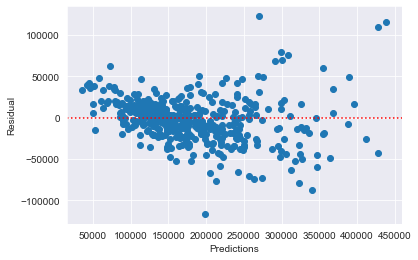

In [109]:
# calculate the residual and plot the results
res = y_test_res
plt.scatter( y_test_pred , res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

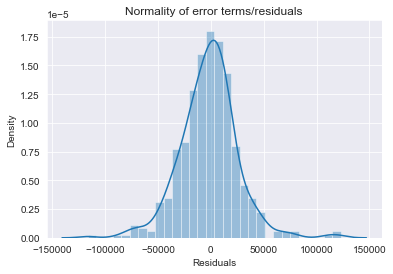

In [110]:
# Distribution of errors
p = sns.distplot(y_test_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

<h2> Ridge Regression </h2>

In [111]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 3.5,
 4.0, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 15, 20, 25, 50, 100, 500, 1000 ]}

In [112]:
ridge = Ridge()

# cross validation
folds = 5
#
ridge_cv = GridSearchCV(estimator = ridge, 
                        scoring= 'neg_mean_absolute_error',  
                        param_grid = params, 
                        return_train_score=True,
                        cv = folds, 
                        verbose = 1)            
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   3.5, 4.0, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10,
                                   15, 20, 25, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [113]:
# fetch the results of our gridsearch
ridge_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004100,2.458117e-03,0.001700,2.436150e-04,0.0001,{'alpha': 0.0001},-22907.420458,-18573.743390,-19873.537357,-17587.015558,...,-19217.580071,2069.258405,30,-15762.155678,-17064.199690,-15743.708945,-17064.029664,-17532.440661,-16633.306928,738.907462
1,0.002501,5.478136e-04,0.001400,3.746867e-04,0.001,{'alpha': 0.001},-22907.197595,-18573.500852,-19872.372987,-17587.101227,...,-19217.222005,2069.156031,29,-15762.030411,-17064.196258,-15743.806488,-17064.044432,-17532.415487,-16633.298615,738.908711
2,0.002000,2.780415e-07,0.001400,1.989128e-04,0.01,{'alpha': 0.01},-22904.963581,-18571.089183,-19860.835225,-17587.938574,...,-19213.662004,2068.141979,28,-15760.780157,-17064.261686,-15744.773381,-17064.185299,-17532.160398,-16633.232184,738.933087
3,0.002100,2.009395e-04,0.001399,2.008438e-04,0.05,{'alpha': 0.05},-22894.928106,-18560.663797,-19811.766061,-17591.601131,...,-19198.515868,2063.606716,27,-15755.276454,-17064.736247,-15749.766414,-17065.455460,-17531.225680,-16633.292051,739.015974
4,0.002401,1.992719e-04,0.001399,1.998912e-04,0.1,{'alpha': 0.1},-22882.185914,-18548.268644,-19756.147841,-17597.104977,...,-19181.365265,2057.839565,26,-15748.517658,-17065.669338,-15758.540381,-17067.181620,-17529.904216,-16633.962643,738.530651
5,0.002400,3.743300e-04,0.001501,1.029350e-06,0.2,{'alpha': 0.2},-22856.282775,-18525.483612,-19660.147355,-17611.060802,...,-19151.130823,2046.785355,25,-15735.856865,-17067.225736,-15775.806904,-17072.197282,-17527.525012,-16635.722360,737.730302
6,0.002200,2.454764e-04,0.001299,2.455736e-04,0.3,{'alpha': 0.3},-22832.518829,-18505.756567,-19577.758098,-17623.919375,...,-19124.560035,2037.536644,24,-15724.038639,-17068.682533,-15793.029697,-17077.689535,-17526.737709,-16638.035623,737.288169
7,0.002101,1.994870e-04,0.001399,1.994639e-04,0.4,{'alpha': 0.4},-22810.398177,-18489.324924,-19505.163708,-17633.899769,...,-19100.458476,2029.822346,23,-15713.384036,-17071.489293,-15809.336679,-17083.513947,-17525.283890,-16640.601569,736.916832
8,0.002400,2.002242e-04,0.001400,1.998673e-04,0.5,{'alpha': 0.5},-22789.259472,-18475.459474,-19440.358694,-17641.641012,...,-19078.291806,2023.120223,22,-15703.670674,-17074.080097,-15824.522271,-17088.620258,-17524.402839,-16643.059228,736.684979
9,0.002200,2.450871e-04,0.001498,1.940440e-06,0.6,{'alpha': 0.6},-22768.489763,-18466.113043,-19386.013096,-17647.610969,...,-19058.911769,2017.053547,21,-15695.614986,-17076.994832,-15839.181706,-17093.498208,-17524.572899,-16645.972526,736.490185


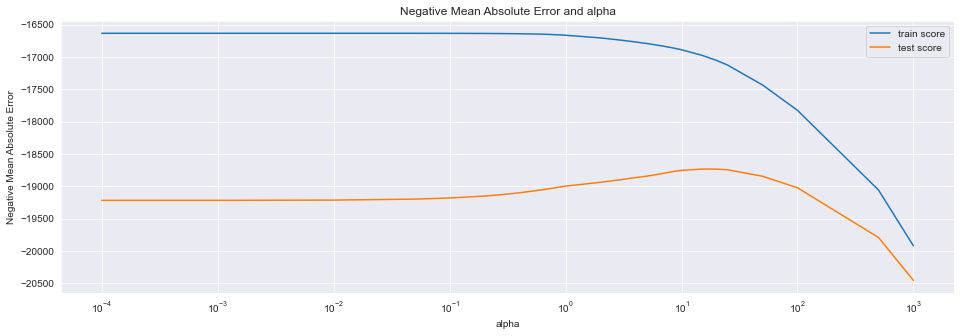

In [114]:
# plot a graph for comparing the test and train performance on different alpha params
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))

# plot train result
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])

# plot test results
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])

# set labels and title 
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")

# plot legend
plt.legend(['train score', 'test score'], loc='upper right')

# show graph
plt.show()

In [115]:
print(ridge_cv.best_params_)

{'alpha': 15}


In [116]:
#Fitting Ridge model for alpha = 15
alpha = ridge_cv.best_params_['alpha']

# initialise Ridge Model
ridge = Ridge(alpha=alpha)

# Fit the data
ridge.fit(X_train, y_train)

# printing coefficients which have been penalised
print(ridge.coef_)

[ 1.34526999e+04  3.36427043e+04 -1.14478950e+04  4.90260206e+03
  2.57987303e+03  3.50336139e+03  9.41748507e+03  1.14955140e+03
 -6.33793724e+02  6.17543824e+03  4.76563087e+03  2.67147503e+04
  6.83563065e+02  2.90954684e+03  8.58493047e+02 -2.87523403e+03
  6.68302927e+03 -1.53799202e+03  2.34821266e+03  2.19316000e+03
  1.25145492e+03  3.98675054e+03  1.11781062e+03  8.37848282e+03
  1.51151202e+04  3.50237805e+02  8.35118806e+03  2.63270723e+03
  5.92180341e+03  1.60940717e+03  1.43284004e+03 -4.82136792e+03
 -8.37015059e+02 -1.99615969e+03 -5.41786447e+03 -9.55668374e+02
 -2.02988289e+03 -3.35047287e+03  8.79031212e+03 -3.06648432e+02
  4.97398619e+03 -1.32809919e+04 -2.81771778e+03  7.25229380e+03
  2.08364280e+03 -7.54713083e+02 -5.87357438e+03 -1.28146228e-05
  8.37712404e+03 -9.65657315e+03 -2.61499113e+02  6.24903255e+03
 -3.97263079e+03  8.03969894e+02  1.66657024e+03 -1.44637552e+03
 -2.40167392e+02 -1.18966857e+02  1.68477957e+03  1.90277800e+03
  1.04934021e+03  9.26111

In [117]:
# Lets calculate some metric21s such as R2 score, RSS and RMSE

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# initialize a list
metric2 = []

# calcuate R2 Score for Training data
metric2.append(r2_score(y_train, y_train_pred))

# calculate R2 Score for Test data
metric2.append(r2_score(y_test, y_test_pred))

# calcuate RSS for Train Data
metric2.append(np.sum(np.square(y_train - y_train_pred)))

# calcuate RSS for Test Data
metric2.append(np.sum(np.square(y_test - y_test_pred)))

# calcuate MSE for Train Data
metric2.append(mean_squared_error(y_train, y_train_pred)**0.5)

# calcuate MSE for Test Data
metric2.append(mean_squared_error(y_test, y_test_pred)**0.5)

# add number of features for the model
metric2.append(len(X_train.columns))

# add the alpha value if present
metric2.append(ridge_cv.best_params_['alpha'])

Observation:
    
    Ridge has done a good coefficient balance with 15 as alpha value for regularizing. But since the number of features is 81 it will make the mode complex and overfit so let try building Ridge model with the RFE train data

lets take train data from RFE and Perform Ridge Regression for as a less complex model

In [118]:
# fit the RFE data to gridcv for ridge
ridge_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   3.5, 4.0, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10,
                                   15, 20, 25, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [119]:
print(ridge_cv.best_params_)

{'alpha': 5.0}


In [120]:
#Fitting Ridge model for alpha = 5
alpha = ridge_cv.best_params_['alpha']

# Initialze Ridhe Model
ridge_rfe = Ridge(alpha=alpha)

# fit rfe data to RIdge model
ridge_rfe.fit(X_train_rfe, y_train)

# printing coefficients which have been penalised
print(ridge_rfe.coef_)

[  6900.98370716 -16022.36677246  10041.08884419   4074.52266194
   4105.24429193   3289.65201776   6068.57955309  25465.33596741
   7187.81855572 -10022.38081467   5055.36377668  35955.07999874
  -8624.19876886   6406.802889    12787.24169813   5817.48382029
   4683.34764077]


In [121]:
# Lets calculate some metric31s such as R2 score, RSS and RMSE

y_train_pred = ridge_rfe.predict(X_train_rfe)
y_test_pred = ridge_rfe.predict(X_test_rfe)

# initialize a list
metric3 = []

# calcuate R2 Score for Training data
metric3.append(r2_score(y_train, y_train_pred))

# calculate R2 Score for Test data
metric3.append(r2_score(y_test, y_test_pred))

# calcuate RSS for Train Data
metric3.append(np.sum(np.square(y_train - y_train_pred)))

# calcuate RSS for Test Data
metric3.append(np.sum(np.square(y_test - y_test_pred)))

# calcuate MSE for Train Data
metric3.append(mean_squared_error(y_train, y_train_pred)**0.5)

# calcuate MSE for Test Data
metric3.append(mean_squared_error(y_test, y_test_pred)**0.5)

# add number of features for the model
metric3.append(len(X_train_rfe.columns))

# add the alpha value if present
metric3.append(ridge_cv.best_params_['alpha'])

In [122]:
metric3

[0.8609296898965451,
 0.8640953578968396,
 945513297644.4009,
 326619972681.7866,
 30431.331115508325,
 27307.649114977427,
 17,
 5.0]

<h2>Lasso Regression</h2>

In [123]:
# create lasso regression instance
lasso = Lasso()

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 10.0, 20, 50, 75, 100, 200, 250, 300, 500, 1000 ]}


# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        return_train_score=True,
                        cv = folds, 
                        param_grid = params, 
                        verbose = 1,
                        scoring= 'neg_mean_absolute_error')            

# fit the train and test data
lasso_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 10.0, 20, 50,
                                   75, 100, 200, 250, 300, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [124]:
# featch Lasso results
lasso_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031699,0.002693,0.001700,0.000245,0.0001,{'alpha': 0.0001},-22878.242029,-18565.352116,-19860.523564,-17580.372829,...,-19206.205601,2059.526244,14,-15762.169054,-17066.999286,-15745.457527,-17065.486358,-17537.243859,-16635.471217,740.149232
1,0.027601,0.002009,0.001200,0.000245,0.001,{'alpha': 0.001},-22878.230209,-18565.342724,-19860.507091,-17580.367981,...,-19206.194653,2059.524774,13,-15762.164145,-17066.997354,-15745.455329,-17065.484431,-17537.240994,-16635.468451,740.149772
2,0.028099,0.003089,0.001501,0.000001,0.01,{'alpha': 0.01},-22878.112004,-18565.248948,-19860.342366,-17580.322419,...,-19206.085782,2059.509604,12,-15762.115058,-17066.978006,-15745.433358,-17065.465164,-17537.212343,-16635.440786,740.155163
3,0.026699,0.001806,0.001501,0.000316,0.05,{'alpha': 0.05},-22877.586649,-18564.832193,-19859.610224,-17580.142957,...,-19205.606523,2059.438552,11,-15761.896891,-17066.892123,-15745.335717,-17065.379530,-17537.085008,-16635.317854,740.179138
4,0.027900,0.002765,0.001700,0.000245,0.1,{'alpha': 0.1},-22876.929956,-18564.310703,-19858.695002,-17579.939833,...,-19205.016898,2059.341111,10,-15761.624182,-17066.784713,-15745.213683,-17065.272487,-17536.926907,-16635.164394,740.209358
5,0.028700,0.001503,0.001600,0.000200,10,{'alpha': 10.0},-22768.155383,-18470.574281,-19656.577485,-17561.883937,...,-19097.384567,2040.249818,9,-15710.514753,-17050.955196,-15742.655250,-17057.101552,-17509.511092,-16614.147568,743.604209
6,0.028199,0.002768,0.001700,0.000245,20,{'alpha': 20},-22671.134976,-18380.373503,-19486.900647,-17548.869381,...,-19002.238466,2025.543388,8,-15672.603638,-17043.375690,-15762.546140,-17071.036324,-17502.109281,-16610.334214,747.411182
7,0.026300,0.002249,0.001800,0.000400,50,{'alpha': 50},-22391.189628,-18310.984584,-18961.568463,-17572.177074,...,-18781.789071,1959.173009,6,-15614.408812,-17110.436898,-15870.394212,-17083.357440,-17493.958027,-16634.511078,747.141315
8,0.028599,0.002130,0.001801,0.000245,75,{'alpha': 75},-22225.181541,-18318.151069,-18703.965784,-17595.439135,...,-18677.013215,1920.712788,5,-15637.298907,-17202.499333,-16009.227929,-17097.295530,-17547.892778,-16698.842895,739.697838
9,0.024600,0.002479,0.001600,0.000200,100,{'alpha': 100},-22181.089412,-18314.179843,-18584.598044,-17604.593877,...,-18623.443290,1928.272122,3,-15704.104883,-17284.015021,-16151.415387,-17128.615585,-17623.522480,-16778.334671,726.601568


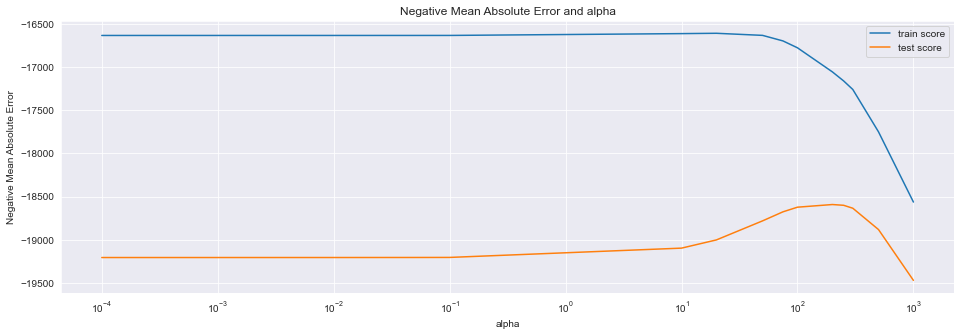

In [125]:
# plot a graph for comparing the test and train performance on different alpha params
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))

# plot train result
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])

# plot test results
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])

# set labels and title 
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")

# plot legend
plt.legend(['train score', 'test score'], loc='upper right')

# show graph
plt.show()

In [126]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 200}


In [127]:
#Fitting Ridge model for alpha = 200
alpha = lasso_cv.best_params_['alpha']

# build Lasso model
lasso = Lasso(alpha=alpha)
        
# fit Train and test data
lasso.fit(X_train, y_train)

Lasso(alpha=200)

In [128]:
# Lets calculate some metric41s such as R2 score, RSS and RMSE

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# initialize a list
metric4 = []

# calcuate R2 Score for Training data
metric4.append(r2_score(y_train, y_train_pred))

# calculate R2 Score for Test data
metric4.append(r2_score(y_test, y_test_pred))

# calcuate RSS for Train Data
metric4.append(np.sum(np.square(y_train - y_train_pred)))

# calcuate RSS for Test Data
metric4.append(np.sum(np.square(y_test - y_test_pred)))

# calcuate MSE for Train Data
metric4.append(mean_squared_error(y_train, y_train_pred)**0.5)

# calcuate MSE for Test Data
metric4.append(mean_squared_error(y_test, y_test_pred)**0.5)

# add number of features for the model
feature_cnt = len(lasso.coef_)-pd.Series(lasso.coef_).apply(lambda x: x == 0).sum()
metric4.append(feature_cnt)

# add the alpha value if present
metric4.append(lasso_cv.best_params_['alpha'])

**Observation:**
    
    Lasso did a great analysis with the advantage oof feature selection which took 53 features outof 81 almost 30 features got to zero coefficient.

Lets build lasso with our rfe data

In [129]:
# fit the Training data from RFE selection
lasso_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 10.0, 20, 50,
                                   75, 100, 200, 250, 300, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [130]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 200}


In [131]:
#Fitting Ridge model for alpha = 200 and printing coefficients which have been penalised
alpha = lasso_cv.best_params_['alpha']

# build lasso for 200 alpha
lasso_rfe = Lasso(alpha=alpha)

# fit the rfe train data and
lasso_rfe.fit(X_train_rfe,y_train)

Lasso(alpha=200)

In [132]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_train_pred = lasso_rfe.predict(X_train_rfe)
y_test_pred = lasso_rfe.predict(X_test_rfe)

# initialize a list
metric5 = []

# calcuate R2 Score for Training data
metric5.append(r2_score(y_train, y_train_pred))

# calculate R2 Score for Test data
metric5.append(r2_score(y_test, y_test_pred))

# calcuate RSS for Train Data
metric5.append(np.sum(np.square(y_train - y_train_pred)))

# calcuate RSS for Test Data
metric5.append(np.sum(np.square(y_test - y_test_pred)))

# calcuate MSE for Train Data
metric5.append(mean_squared_error(y_train, y_train_pred)**0.5)

# calcuate MSE for Test Data
metric5.append(mean_squared_error(y_test, y_test_pred)**0.5)

# add number of features for the model
feature_cnt = len(lasso_rfe.coef_)-pd.Series(lasso_rfe.coef_).apply(lambda x: x == 0).sum()
metric5.append(feature_cnt)

# add the alpha value if present
metric5.append(lasso_cv.best_params_['alpha'])

<h2> Model Summary </h2><br>

In [133]:
betas = pd.DataFrame(index=X_train.columns.values, 
                     columns = ['Linear', 'Linear RFE','Ridge','Ridge RFE', 'Lasso', 'Lasso RFE'])

betas.loc[X_train.columns,'Linear'] = lr.coef_ # Polynomial Regression
betas.loc[X_train_rfe.columns,'Linear RFE'] = lr_rfe.coef_ # Polynomial Regression
betas.loc[X_train.columns,'Ridge'] = ridge.coef_ # Ridge Regression
betas.loc[X_train_rfe.columns,'Ridge RFE'] = ridge_rfe.coef_ # Ridge Regression
betas.loc[X_train.columns,'Lasso'] = lasso.coef_ # Lasso Regression
betas.loc[X_train_rfe.columns,'Lasso RFE'] = lasso_rfe.coef_ # Lasso Regression

print("\n\n   ======== Coefficients for features under each model built ========")

betas['Total Coeff'] = abs(betas).sum(axis=1)

betas.sort_values(by='Total Coeff',ascending=False)



   ======== Coefficients for features under each model built ========


,Linear,Linear RFE,Ridge,Ridge RFE,Lasso,Lasso RFE,Total Coeff
Neighborhood_Sawyer,153149,-8873.01,-5417.86,-8624.2,-2403.32,-7327.66,185794.693920
Neighborhood_NridgHt,963.74,38945.4,26714.8,35955.1,32019.3,36100,170698.358933
GrLivArea,-303.66,25688,-11447.9,25465.3,-21255.2,25559.5,109719.658790
BldgType_Twnhs,17289.7,-17443.3,-13281,-16022.4,-15309.4,-14628.1,93973.886174
TotalFlrSFAbvGrd,4318.88,NaN,33642.7,NaN,53613,NaN,91574.571921
...,...,...,...,...,...,...,...
Exterior2nd_CmentBd,-1740.67,NaN,-335.792,NaN,0,NaN,2076.465502
MasVnrType_Stone,518.009,NaN,-1446.38,NaN,0,NaN,1964.384500
Exterior2nd_Wd Sdng,829.214,NaN,-837.015,NaN,-0,NaN,1666.229494
LandContour_Lvl,488.606,NaN,803.97,NaN,-0,NaN,1292.575890


Top Five features on overall coeff score based on the six models are :
<b>
<ul>
<ol>TotalFlrSFAbvGrd</ol>
<ol>Neighborhood_NridgHt</ol>
<ol>Neighborhood_Sawyer</ol>
<ol>SaleType_New</ol>
<ol>BldgType_Twnhs</ol>
</ul>
</b>

To do:
    
    We can see that the least used features where the Exterior2nd column which doesn't impact SalePrice much.. we can try rebuilding the model by removing it

In [134]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','No of Features','Alpha'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

lr_metric_rfe = pd.Series(metric1, name = 'Linear Regression RFE')

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
rg_rfe_metric = pd.Series(metric3, name = 'Ridge Regression RFE')
ls_metric = pd.Series(metric4, name = 'Lasso Regression')
ls_rfe_metric = pd.Series(metric5, name = 'Lasso Regression RFE')

final_metric = pd.concat([lr_metric,lr_metric_rfe, rg_metric,rg_rfe_metric, ls_metric,ls_rfe_metric], axis = 1)

print("\n\n  \t\t\t\t  ============= Overall view of the models ================")

round(final_metric,4).astype(str)



  				  ============= Overall view of the models ================


,Metric,Linear Regression,Linear Regression RFE,Ridge Regression,Ridge Regression RFE,Lasso Regression,Lasso Regression RFE
0,R2 Score (Train),0.9152,0.861,0.9032,0.8609,0.9033,0.8608
1,R2 Score (Test),0.8855,0.8629,0.8957,0.8641,0.8937,0.8651
2,RSS (Train),576511143572.8478,944833529003.231,658073393086.824,945513297644.4008,657411191736.9236,946582105641.886
3,RSS (Test),275074223117.3338,329535235094.6472,250751367200.9018,326619972681.7866,255386384386.2092,324254531462.607
4,MSE (Train),23762.4372,30420.39,25387.7548,30431.3311,25374.9781,30448.526
5,MSE (Test),25060.3939,27429.2463,23926.7989,27307.6491,24146.924,27208.586
6,No of Features,81.0,17.0,81.0,17.0,53.0,17.0
7,Alpha,0.0,0.0,15.0,5.0,200.0,200.0


<h1> Conclusion </h1>

In [135]:
print("\n\n \t   =============== Final models ================")

round(final_metric[['Metric','Linear Regression RFE','Ridge Regression RFE','Lasso Regression RFE']],4).astype(str)



 	   =============== Final models ================


,Metric,Linear Regression RFE,Ridge Regression RFE,Lasso Regression RFE
0,R2 Score (Train),0.861,0.8609,0.8608
1,R2 Score (Test),0.8629,0.8641,0.8651
2,RSS (Train),944833529003.231,945513297644.4008,946582105641.886
3,RSS (Test),329535235094.6472,326619972681.7866,324254531462.607
4,MSE (Train),30420.39,30431.3311,30448.526
5,MSE (Test),27429.2463,27307.6491,27208.586
6,No of Features,17.0,17.0,17.0
7,Alpha,0.0,5.0,200.0


**The final models have the train and test R2 Score with a very minimal difference of 0.001 R2 score between the models for train data and 0.002 incease in R2 score for successive models**

Lasso looks better than the other models, So we can conclude that Lasso performs well in these regressions

<br>
<h1>PART II<h1>

<h2>Question 1</h2>

In [136]:
#Fitting Ridge model for alpha = 10 double the size of 5 from our final model
alpha = 10
ridge_rfe_q1 = Ridge(alpha=alpha)

ridge_rfe_q1.fit(X_train_rfe, y_train)

# printing coefficients which have been penalised
print(ridge_rfe_q1.coef_)

[  6981.7010429  -14819.80670374  10039.15315902   4240.84408331
   4332.24957918   3383.58444974   6151.111813    25257.12920976
   7281.72371619  -9707.13160448   5216.34899188  33419.26594786
  -8385.2814638    6323.20467072  12893.56987926   5796.2963183
   4528.64077251]


In [137]:
# Lets calculate some metric31s such as R2 score, RSS and RMSE

y_train_pred = ridge_rfe_q1.predict(X_train_rfe)
y_test_pred = ridge_rfe_q1.predict(X_test_rfe)

print('\nIntercept:', ridge_rfe_q1.intercept_)
print('Coefficients:', ridge_rfe_q1.coef_)
print('\n\nTrain results \n')
print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Coefficient of Determination (R2): {:.3f}'.format(r2_score(y_train, y_train_pred)))
print('Residual Sum of Squares (RSS): {:.2f}'.format(np.sum(np.square(y_train - y_train_pred))))


print('\n\nTest results \n')
print('Test Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Test Coefficient of Determination (R2): {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('Test Residual Sum of Squares (RSS): {:.2f} \n'.format(np.sum(np.square(y_test - y_test_pred))))


Intercept: 183762.69887720555
Coefficients: [  6981.7010429  -14819.80670374  10039.15315902   4240.84408331
   4332.24957918   3383.58444974   6151.111813    25257.12920976
   7281.72371619  -9707.13160448   5216.34899188  33419.26594786
  -8385.2814638    6323.20467072  12893.56987926   5796.2963183
   4528.64077251]


Train results 

Mean squared error (MSE): 927697253.01
Coefficient of Determination (R2): 0.861
Residual Sum of Squares (RSS): 947178895319.48


Test results 

Test Mean squared error (MSE): 741130564.26
Test Coefficient of Determination (R2): 0.865
Test Residual Sum of Squares (RSS): 324615187145.79 



In [138]:
# Create a DataFrame with Top Features with highest coefficients
ridge_q1 = pd.DataFrame([X_train_rfe.columns.values,ridge_rfe_q1.coef_])\
        .T.rename(columns={0:'Features',1:'Coefficients'})
ridge_q1.reindex(ridge_q1.Coefficients.abs().sort_values(ascending=False).index).head()

,Features,Coefficients
11,Neighborhood_NridgHt,33419.3
7,GrLivArea,25257.1
1,BldgType_Twnhs,-14819.8
14,OverallQual,12893.6
2,BsmtFinSF1,10039.2


In [139]:
#Fitting Ridge model for alpha = 400 double teh size of 200
alpha = 400

# build the lasso model
lasso_rfe_q1 = Lasso(alpha=alpha)
        
# fit train data
lasso_rfe_q1.fit(X_train_rfe, y_train) 

Lasso(alpha=400)

In [140]:
# Lets calculate some metric51s such as R2 score, RSS and RMSE

y_train_pred = lasso_rfe_q1.predict(X_train_rfe)
y_test_pred = lasso_rfe_q1.predict(X_test_rfe)


print('\nIntercept:', lasso_rfe_q1.intercept_)
print('Coefficients:', lasso_rfe_q1.coef_)
print('\n\nTrain results \n')
print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Coefficient of Determination (R2): {:.3f}'.format(r2_score(y_train, y_train_pred)))
print('Residual Sum of Squares (RSS): {:.2f}'.format(np.sum(np.square(y_train - y_train_pred))))


print('\n\nTest results \n')
print('Test Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Test Coefficient of Determination (R2): {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('Test Residual Sum of Squares (RSS): {:.2f} \n'.format(np.sum(np.square(y_test - y_test_pred))))


Intercept: 182420.81272943498
Coefficients: [  6714.22972319 -11815.05675149   9918.46499059   4346.30592518
   4359.06680408   3314.57550477   6079.42218141  25433.56132215
   7490.43351798  -6886.48180736   4926.57815731  33254.78213882
  -5781.1189717    5778.55633644  13398.3032783    5787.35072693
   4434.42630519]


Train results 

Mean squared error (MSE): 932248035.95
Coefficient of Determination (R2): 0.860
Residual Sum of Squares (RSS): 951825244702.81


Test results 

Test Mean squared error (MSE): 732416895.46
Test Coefficient of Determination (R2): 0.867
Test Residual Sum of Squares (RSS): 320798600213.47 



In [141]:
# Create a DataFrame with Top Features with highest coefficients
lasso_q1 = pd.DataFrame([X_train_rfe.columns.values,lasso_rfe_q1.coef_])\
        .T.rename(columns={0:'Features',1:'Coefficients'})
lasso_q1 = lasso_q1.reindex(lasso_q1.Coefficients.abs().sort_values(ascending=False).index)
lasso_q1.head()

,Features,Coefficients
11,Neighborhood_NridgHt,33254.8
7,GrLivArea,25433.6
14,OverallQual,13398.3
1,BldgType_Twnhs,-11815.1
2,BsmtFinSF1,9918.46


<h2>Question 3</h2>

<h3>Lasso Q3</h3>

In [142]:
# copy the train and test as we have to remove 5 features from the dataset
X_train_q3 = X_train[:]
X_test_q3 = X_test[:]

In [143]:
# get the top 5 features based on Coefficient in Lasso Model
betas_lasso_q3 = betas.reindex(betas['Lasso RFE'].abs().sort_values(ascending=False).index)
betas_lasso_q3[['Lasso RFE']].head()

,Lasso RFE
Neighborhood_NridgHt,36100
GrLivArea,25559.5
BldgType_Twnhs,-14628.1
OverallQual,13028.2
BsmtFinSF1,9974.51


In [144]:
# remove the features from the train and test data
for col in betas_lasso_q3['Lasso RFE'].head().index.values:
    X_train_q3.pop(col)
    X_test_q3.pop(col)

In [145]:
# preivew the shape
X_train_q3.shape,X_test_q3.shape

((1021, 76), (438, 76))

In [146]:
# perform RFE again  for the new train data set
X_train_q3 = perform_feature_selection(X_train_q3,rfe=True)
X_test_q3 = X_test_q3[X_train_q3.columns]

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     669.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          7.12e-114
Time:                        11:53:14   Log-Likelihood:                -12738.
No. Observations:                1021   AIC:                         2.548e+04
Df Residuals:                    1019   BIC:                         2.549e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.822e+05   1985.889     91.743      0.0

,Features,VIF
0,1stFlrSF,1.04
1,2ndFlrSF,1.04


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     725.3
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          4.67e-252
Time:                        11:53:14   Log-Likelihood:                -12412.
No. Observations:                1021   AIC:                         2.483e+04
Df Residuals:                    1017   BIC:                         2.485e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.822e+05   1444.152    126.157   

,Features,VIF
1,2ndFlrSF,1.49
2,BedroomAbvGr,1.46
0,1stFlrSF,1.14


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     543.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          1.36e-250
Time:                        11:53:14   Log-Likelihood:                -12412.
No. Observations:                1021   AIC:                         2.483e+04
Df Residuals:                    1016   BIC:                         2.486e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.822e+05   1513.968    1

,Features,VIF
1,2ndFlrSF,1.49
2,BedroomAbvGr,1.46
0,1stFlrSF,1.14


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     573.6
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          8.83e-259
Time:                        11:53:14   Log-Likelihood:                -12393.
No. Observations:                1021   AIC:                         2.480e+04
Df Residuals:                    1016   BIC:                         2.482e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.794e+05   1487.548    1

,Features,VIF
1,2ndFlrSF,1.49
2,BedroomAbvGr,1.48
0,1stFlrSF,1.23
3,BsmtExposure_Gd,1.08


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     478.2
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          7.21e-264
Time:                        11:53:14   Log-Likelihood:                -12378.
No. Observations:                1021   AIC:                         2.477e+04
Df Residuals:                    1015   BIC:                         2.480e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.807e+05   1486.347    1

,Features,VIF
1,2ndFlrSF,1.50
2,BedroomAbvGr,1.48
0,1stFlrSF,1.23
3,BsmtExposure_Gd,1.08
4,BsmtExposure_NA,1.01


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     591.1
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12228.
No. Observations:                1021   AIC:                         2.447e+04
Df Residuals:                    1014   BIC:                         2.451e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.791e+05   1287.505    1

,Features,VIF
1,2ndFlrSF,1.75
5,BsmtQual,1.75
2,BedroomAbvGr,1.61
0,1stFlrSF,1.49
4,BsmtExposure_NA,1.37
3,BsmtExposure_Gd,1.09


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     512.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12223.
No. Observations:                1021   AIC:                         2.446e+04
Df Residuals:                    1013   BIC:                         2.450e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             1.69e+05   3469.941     

,Features,VIF
5,BsmtQual,1.78
1,2ndFlrSF,1.75
2,BedroomAbvGr,1.61
0,1stFlrSF,1.51
4,BsmtExposure_NA,1.42
3,BsmtExposure_Gd,1.19
6,Condition1_Norm,1.14


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     448.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12223.
No. Observations:                1021   AIC:                         2.446e+04
Df Residuals:                    1012   BIC:                         2.451e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.699e+05   3624.125     

,Features,VIF
5,BsmtQual,1.78
1,2ndFlrSF,1.75
2,BedroomAbvGr,1.61
0,1stFlrSF,1.51
4,BsmtExposure_NA,1.42
3,BsmtExposure_Gd,1.19
6,Condition1_Norm,1.14


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     450.3
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12221.
No. Observations:                1021   AIC:                         2.446e+04
Df Residuals:                    1012   BIC:                         2.451e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.657e+05   3833.536     

,Features,VIF
5,BsmtQual,1.78
1,2ndFlrSF,1.75
2,BedroomAbvGr,1.61
0,1stFlrSF,1.52
4,BsmtExposure_NA,1.42
3,BsmtExposure_Gd,1.19
6,Condition1_Norm,1.14
7,Condition1_RRAn,1.00


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     465.1
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12160.
No. Observations:                1021   AIC:                         2.434e+04
Df Residuals:                    1011   BIC:                         2.439e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.688e+05   3622.348     

,Features,VIF
5,BsmtQual,2.48
8,ExterQual,1.95
1,2ndFlrSF,1.86
2,BedroomAbvGr,1.66
0,1stFlrSF,1.64
4,BsmtExposure_NA,1.49
3,BsmtExposure_Gd,1.20
6,Condition1_Norm,1.14
7,Condition1_RRAn,1.00


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     463.8
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12161.
No. Observations:                1021   AIC:                         2.434e+04
Df Residuals:                    1011   BIC:                         2.439e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.687e+05   3

,Features,VIF
7,ExterQual,1.86
1,2ndFlrSF,1.85
4,BsmtQual,1.73
2,BedroomAbvGr,1.65
0,1stFlrSF,1.61
3,BsmtExposure_Gd,1.20
5,Condition1_Norm,1.10
6,Condition1_RRAn,1.00


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     463.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12162.
No. Observations:                1021   AIC:                         2.434e+04
Df Residuals:                    1011   BIC:                         2.439e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.689e+05   3

,Features,VIF
7,ExterQual,1.86
1,2ndFlrSF,1.85
4,BsmtQual,1.73
2,BedroomAbvGr,1.65
0,1stFlrSF,1.61
3,BsmtExposure_Gd,1.20
5,Condition1_Norm,1.10
6,Condition1_RRAn,1.00


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     464.0
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12161.
No. Observations:                1021   AIC:                         2.434e+04
Df Residuals:                    1011   BIC:                         2.439e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.684e+05   3

,Features,VIF
7,ExterQual,1.86
1,2ndFlrSF,1.85
4,BsmtQual,1.73
2,BedroomAbvGr,1.65
0,1stFlrSF,1.61
3,BsmtExposure_Gd,1.20
5,Condition1_Norm,1.10
6,Condition1_RRAn,1.00


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     465.0
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12160.
No. Observations:                1021   AIC:                         2.434e+04
Df Residuals:                    1011   BIC:                         2.439e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.673e+05   3

,Features,VIF
7,ExterQual,1.86
1,2ndFlrSF,1.85
4,BsmtQual,1.73
2,BedroomAbvGr,1.65
0,1stFlrSF,1.61
3,BsmtExposure_Gd,1.20
5,Condition1_Norm,1.10
6,Condition1_RRAn,1.00


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     465.7
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12160.
No. Observations:                1021   AIC:                         2.434e+04
Df Residuals:                    1011   BIC:                         2.439e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.71e+05   3

,Features,VIF
8,Exterior2nd_Wd Sdng,1.94
7,ExterQual,1.93
1,2ndFlrSF,1.85
4,BsmtQual,1.83
5,Condition1_Norm,1.80
2,BedroomAbvGr,1.65
0,1stFlrSF,1.61
3,BsmtExposure_Gd,1.20
6,Condition1_RRAn,1.02


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     423.3
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12155.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                    1010   BIC:                         2.439e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.711e+05   3

,Features,VIF
1,2ndFlrSF,2.04
7,ExterQual,1.94
8,Exterior2nd_Wd Sdng,1.94
0,1stFlrSF,1.90
4,BsmtQual,1.85
5,Condition1_Norm,1.80
2,BedroomAbvGr,1.68
9,FireplaceQu,1.44
3,BsmtExposure_Gd,1.20
6,Condition1_RRAn,1.02


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     423.6
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12155.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                    1010   BIC:                         2.439e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.745e+05   3

,Features,VIF
1,2ndFlrSF,2.04
6,ExterQual,1.94
7,Exterior2nd_Wd Sdng,1.92
0,1stFlrSF,1.90
4,BsmtQual,1.84
5,Condition1_Norm,1.79
2,BedroomAbvGr,1.68
8,FireplaceQu,1.44
3,BsmtExposure_Gd,1.20


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     450.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12129.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                    1010   BIC:                         2.434e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.73e+05   3

,Features,VIF
0,1stFlrSF,2.22
1,2ndFlrSF,2.14
6,ExterQual,2.01
7,Exterior2nd_Wd Sdng,1.94
4,BsmtQual,1.87
5,Condition1_Norm,1.80
9,GarageArea,1.74
2,BedroomAbvGr,1.69
8,FireplaceQu,1.44
3,BsmtExposure_Gd,1.21


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     449.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12130.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                    1010   BIC:                         2.434e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.715e+05   3182.269     

,Features,VIF
0,1stFlrSF,2.22
1,2ndFlrSF,2.14
6,ExterQual,1.95
4,BsmtQual,1.78
8,GarageArea,1.73
2,BedroomAbvGr,1.69
7,FireplaceQu,1.44
3,BsmtExposure_Gd,1.20
5,Condition1_Norm,1.10


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     450.0
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12130.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                    1010   BIC:                         2.434e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.712e+05   3196

,Features,VIF
0,1stFlrSF,2.23
1,2ndFlrSF,2.23
6,ExterQual,1.95
4,BsmtQual,1.79
8,GarageArea,1.73
2,BedroomAbvGr,1.70
7,FireplaceQu,1.45
9,GarageType_BuiltIn,1.31
3,BsmtExposure_Gd,1.20
5,Condition1_Norm,1.19


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     452.1
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12128.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                    1010   BIC:                         2.433e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.737e+05   3308.82

,Features,VIF
0,1stFlrSF,2.22
1,2ndFlrSF,2.14
6,ExterQual,1.95
4,BsmtQual,1.78
8,GarageArea,1.73
2,BedroomAbvGr,1.69
7,FireplaceQu,1.44
3,BsmtExposure_Gd,1.20
5,Condition1_Norm,1.10


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     451.8
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12128.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                    1010   BIC:                         2.433e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.705e+05   3209.011     

,Features,VIF
8,GarageArea,2.31
0,1stFlrSF,2.27
1,2ndFlrSF,2.15
6,ExterQual,1.95
4,BsmtQual,1.79
2,BedroomAbvGr,1.69
9,GarageType_NA,1.48
7,FireplaceQu,1.45
3,BsmtExposure_Gd,1.21
5,Condition1_Norm,1.14


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     411.0
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -12127.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                    1009   BIC:                         2.434e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.706e+05   3209.548     

,Features,VIF
8,GarageArea,2.69
10,GarageYrBlt,2.32
0,1stFlrSF,2.31
1,2ndFlrSF,2.19
4,BsmtQual,2.14
6,ExterQual,2.08
2,BedroomAbvGr,1.69
9,GarageType_NA,1.48
7,FireplaceQu,1.46
3,BsmtExposure_Gd,1.21


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     433.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12105.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                    1009   BIC:                         2.429e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             1.71e+05   3138.636     

,Features,VIF
6,ExterQual,2.61
10,KitchenQual,2.37
8,GarageArea,2.33
0,1stFlrSF,2.30
1,2ndFlrSF,2.18
4,BsmtQual,1.81
2,BedroomAbvGr,1.71
9,GarageType_NA,1.48
7,FireplaceQu,1.46
3,BsmtExposure_Gd,1.21


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     397.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12105.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                    1008   BIC:                         2.430e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             1.71e+05   3140.106     

,Features,VIF
6,ExterQual,2.63
10,KitchenQual,2.37
8,GarageArea,2.33
0,1stFlrSF,2.30
1,2ndFlrSF,2.18
4,BsmtQual,1.81
2,BedroomAbvGr,1.72
9,GarageType_NA,1.48
7,FireplaceQu,1.46
3,BsmtExposure_Gd,1.29


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     397.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12104.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                    1008   BIC:                         2.430e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.691e+05   4589.307     

,Features,VIF
6,ExterQual,2.61
10,KitchenQual,2.37
8,GarageArea,2.33
0,1stFlrSF,2.30
1,2ndFlrSF,2.18
4,BsmtQual,1.81
2,BedroomAbvGr,1.71
9,GarageType_NA,1.48
7,FireplaceQu,1.46
3,BsmtExposure_Gd,1.21


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     405.6
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12096.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                    1008   BIC:                         2.428e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.705e+05   3116.152     

,Features,VIF
6,ExterQual,2.62
0,1stFlrSF,2.41
10,KitchenQual,2.37
8,GarageArea,2.34
1,2ndFlrSF,2.22
4,BsmtQual,1.82
2,BedroomAbvGr,1.72
9,GarageType_NA,1.48
7,FireplaceQu,1.47
11,LotArea,1.33


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     374.8
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12095.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                    1007   BIC:                         2.429e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.699e+05   3148.177     

,Features,VIF
6,ExterQual,2.62
0,1stFlrSF,2.42
10,KitchenQual,2.37
8,GarageArea,2.35
1,2ndFlrSF,2.22
4,BsmtQual,1.82
2,BedroomAbvGr,1.72
9,GarageType_NA,1.48
11,LotArea,1.48
7,FireplaceQu,1.47


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     374.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12096.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                    1007   BIC:                         2.429e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.704e+05   3121.955     

,Features,VIF
6,ExterQual,2.62
0,1stFlrSF,2.41
10,KitchenQual,2.37
8,GarageArea,2.34
1,2ndFlrSF,2.22
4,BsmtQual,1.82
2,BedroomAbvGr,1.72
9,GarageType_NA,1.48
7,FireplaceQu,1.47
11,LotArea,1.33


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     378.3
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12091.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                    1007   BIC:                         2.428e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.638e+05   3791.212     

,Features,VIF
12,MSZoning_RL,4.22
5,Condition1_Norm,4.15
6,ExterQual,2.62
0,1stFlrSF,2.42
10,KitchenQual,2.37
8,GarageArea,2.35
1,2ndFlrSF,2.26
4,BsmtQual,1.82
2,BedroomAbvGr,1.76
9,GarageType_NA,1.49


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     351.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12090.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                    1006   BIC:                         2.428e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.693e+05   6003.129     

,Features,VIF
12,MSZoning_RL,4.22
5,Condition1_Norm,4.15
6,ExterQual,2.62
0,1stFlrSF,2.42
10,KitchenQual,2.37
8,GarageArea,2.35
1,2ndFlrSF,2.26
4,BsmtQual,1.82
2,BedroomAbvGr,1.76
9,GarageType_NA,1.49


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     369.0
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12070.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                    1006   BIC:                         2.424e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.644e+05   3715.570     

,Features,VIF
12,MSZoning_RL,4.23
5,Condition1_Norm,4.15
6,ExterQual,2.65
0,1stFlrSF,2.48
8,GarageArea,2.40
10,KitchenQual,2.38
1,2ndFlrSF,2.29
4,BsmtQual,1.83
2,BedroomAbvGr,1.76
7,FireplaceQu,1.49


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     352.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12059.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                    1005   BIC:                         2.423e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.667e+05   3714

,Features,VIF
12,MSZoning_RL,4.46
5,Condition1_Norm,4.28
6,ExterQual,2.65
0,1stFlrSF,2.48
8,GarageArea,2.40
10,KitchenQual,2.38
1,2ndFlrSF,2.29
14,MasVnrType_BrkFace,2.12
13,MasVnrArea,1.86
4,BsmtQual,1.83


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     354.0
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12058.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                    1005   BIC:                         2.423e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.683e+05 

,Features,VIF
11,MSZoning_RL,4.74
5,Condition1_Norm,4.30
6,ExterQual,2.65
0,1stFlrSF,2.44
9,KitchenQual,2.38
1,2ndFlrSF,2.30
13,MasVnrType_BrkFace,2.20
12,MasVnrArea,1.90
4,BsmtQual,1.86
8,GarageArea,1.81


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     332.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12056.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                    1004   BIC:                         2.423e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.713e+05 

,Features,VIF
11,MSZoning_RL,4.74
5,Condition1_Norm,4.30
6,ExterQual,2.65
0,1stFlrSF,2.44
9,KitchenQual,2.38
1,2ndFlrSF,2.30
13,MasVnrType_BrkFace,2.20
12,MasVnrArea,1.90
4,BsmtQual,1.86
8,GarageArea,1.81


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     332.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12056.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                    1004   BIC:                         2.423e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.685e+05 

,Features,VIF
11,MSZoning_RL,4.74
5,Condition1_Norm,4.30
6,ExterQual,2.65
0,1stFlrSF,2.44
9,KitchenQual,2.38
1,2ndFlrSF,2.30
13,MasVnrType_BrkFace,2.20
12,MasVnrArea,1.90
4,BsmtQual,1.86
8,GarageArea,1.81


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     346.0
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12039.
No. Observations:                1021   AIC:                         2.411e+04
Df Residuals:                    1004   BIC:                         2.420e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.674e+05 

,Features,VIF
11,MSZoning_RL,4.74
5,Condition1_Norm,4.31
6,ExterQual,2.66
0,1stFlrSF,2.45
9,KitchenQual,2.43
1,2ndFlrSF,2.30
13,MasVnrType_BrkFace,2.20
4,BsmtQual,1.91
12,MasVnrArea,1.91
8,GarageArea,1.81


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     346.3
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12039.
No. Observations:                1021   AIC:                         2.411e+04
Df Residuals:                    1004   BIC:                         2.420e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.712e+05 

,Features,VIF
10,MSZoning_RL,5.37
5,Condition1_Norm,5.36
15,SaleCondition_Normal,4.72
6,ExterQual,2.67
8,KitchenQual,2.46
12,MasVnrType_BrkFace,2.23
0,1stFlrSF,2.22
1,2ndFlrSF,2.18
4,BsmtQual,1.91
11,MasVnrArea,1.91


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     367.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12041.
No. Observations:                1021   AIC:                         2.411e+04
Df Residuals:                    1005   BIC:                         2.419e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.67e+05 

,Features,VIF
10,MSZoning_RL,4.71
5,Condition1_Norm,4.28
6,ExterQual,2.66
8,KitchenQual,2.43
0,1stFlrSF,2.22
12,MasVnrType_BrkFace,2.20
1,2ndFlrSF,2.14
4,BsmtQual,1.90
11,MasVnrArea,1.90
7,GarageArea,1.80


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     357.1
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12025.
No. Observations:                1021   AIC:                         2.408e+04
Df Residuals:                    1004   BIC:                         2.417e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.63e+

,Features,VIF
10,MSZoning_RL,4.74
5,Condition1_Norm,4.36
6,ExterQual,2.71
8,KitchenQual,2.45
12,MasVnrType_BrkFace,2.23
0,1stFlrSF,2.22
1,2ndFlrSF,2.15
4,BsmtQual,1.91
11,MasVnrArea,1.91
7,GarageArea,1.81


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     340.3
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12020.
No. Observations:                1021   AIC:                         2.408e+04
Df Residuals:                    1003   BIC:                         2.416e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.627e+

,Features,VIF
10,MSZoning_RL,4.74
5,Condition1_Norm,4.37
6,ExterQual,2.71
8,KitchenQual,2.45
12,MasVnrType_BrkFace,2.24
0,1stFlrSF,2.22
1,2ndFlrSF,2.15
4,BsmtQual,1.92
11,MasVnrArea,1.91
7,GarageArea,1.81


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     325.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12013.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                    1002   BIC:                         2.416e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.63e+

,Features,VIF
15,SaleCondition_Partial,47.08
17,SaleType_New,47.06
10,MSZoning_RL,4.75
5,Condition1_Norm,4.37
6,ExterQual,2.71
8,KitchenQual,2.46
12,MasVnrType_BrkFace,2.24
0,1stFlrSF,2.22
1,2ndFlrSF,2.15
4,BsmtQual,1.92


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     340.3
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12020.
No. Observations:                1021   AIC:                         2.408e+04
Df Residuals:                    1003   BIC:                         2.416e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.627e+

,Features,VIF
10,MSZoning_RL,4.74
5,Condition1_Norm,4.37
6,ExterQual,2.71
8,KitchenQual,2.45
12,MasVnrType_BrkFace,2.24
0,1stFlrSF,2.22
1,2ndFlrSF,2.15
4,BsmtQual,1.92
11,MasVnrArea,1.91
7,GarageArea,1.81


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     321.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12019.
No. Observations:                1021   AIC:                         2.408e+04
Df Residuals:                    1002   BIC:                         2.417e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.626e+

,Features,VIF
10,MSZoning_RL,4.74
5,Condition1_Norm,4.37
6,ExterQual,2.71
8,KitchenQual,2.45
12,MasVnrType_BrkFace,2.24
0,1stFlrSF,2.22
1,2ndFlrSF,2.15
4,BsmtQual,1.92
11,MasVnrArea,1.91
7,GarageArea,1.81


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     328.8
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12009.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                    1002   BIC:                         2.415e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.623e+

,Features,VIF
10,MSZoning_RL,4.74
5,Condition1_Norm,4.37
17,TotalBsmtSF,4.16
0,1stFlrSF,3.74
6,ExterQual,2.71
4,BsmtQual,2.54
8,KitchenQual,2.45
1,2ndFlrSF,2.26
12,MasVnrType_BrkFace,2.24
11,MasVnrArea,1.92


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     354.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -11976.
No. Observations:                1021   AIC:                         2.399e+04
Df Residuals:                    1002   BIC:                         2.408e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.641e+

,Features,VIF
17,TotalFlrSFAbvGrd,218.21
1,2ndFlrSF,165.13
0,1stFlrSF,116.80
10,MSZoning_RL,4.43
5,Condition1_Norm,4.33
16,TotalBsmtSF,4.08
6,ExterQual,2.71
4,BsmtQual,2.45
8,KitchenQual,2.45
12,MasVnrType_BrkFace,2.16


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     347.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:                -12011.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                    1003   BIC:                         2.415e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.62e+

,Features,VIF
10,MSZoning_RL,4.42
5,Condition1_Norm,4.32
16,TotalBsmtSF,4.08
0,1stFlrSF,3.71
6,ExterQual,2.70
4,BsmtQual,2.45
8,KitchenQual,2.45
1,2ndFlrSF,2.24
12,MasVnrType_BrkFace,2.15
11,MasVnrArea,1.87


In [147]:
# fit the lasso gid cv with new set of features
lasso_cv.fit(X_train_q3, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 10.0, 20, 50,
                                   75, 100, 200, 250, 300, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [148]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised
alpha = lasso_cv.best_params_['alpha']

# build lasso for alpha
lasso_rfe_q3 = Lasso(alpha=alpha)

# fit rfe train data
lasso_rfe_q3.fit(X_train_q3,y_train)

Lasso(alpha=50)

In [149]:
# Lets calculate some metric51s such as R2 score, RSS and RMSE

y_train_pred = lasso_rfe_q3.predict(X_train_q3)
y_test_pred = lasso_rfe_q3.predict(X_test_q3)

print('\nIntercept:', lasso_rfe_q3.intercept_)
print('Coefficients:', lasso_rfe_q3.coef_)
print('\n\nTrain results \n')
print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Coefficient of Determination (R2): {:.3f}'.format(r2_score(y_train, y_train_pred)))
print('Residual Sum of Squares (RSS): {:.2f}'.format(np.sum(np.square(y_train - y_train_pred))))


print('\n\nTest results \n')
print('Test Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Test Coefficient of Determination (R2): {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('Test Residual Sum of Squares (RSS): {:.2f} \n'.format(np.sum(np.square(y_test - y_test_pred))))


Intercept: 162787.37244586565
Coefficients: [ 30615.16146245  32032.5745369   -7145.74481506  21634.35820298
   9845.39231349   9800.5493571    8607.91597881   7725.33860237
   9319.03713899   2844.97327198  12628.37523675  11133.70080835
 -11044.73756248   6845.6477716   21821.05808599  51471.99709917
   9459.65806818]


Train results 

Mean squared error (MSE): 968048711.70
Coefficient of Determination (R2): 0.855
Residual Sum of Squares (RSS): 988377734642.40


Test results 

Test Mean squared error (MSE): 838964818.44
Test Coefficient of Determination (R2): 0.847
Test Residual Sum of Squares (RSS): 367466590474.77 



In [150]:
# get the top 5 features based on Coefficient in Lasso Model

lasso_q3 = pd.DataFrame([X_train_q3.columns.values,lasso_rfe_q3.coef_])\
        .T.rename(columns={0:'Features',1:'Coefficients'})
lasso_q3 = lasso_q3.reindex(lasso_q3.Coefficients.abs().sort_values(ascending=False).index)

print("\n\nNew top 5 Predictors for Lasso")
lasso_q3.head()



New top 5 Predictors for Lasso


,Features,Coefficients
15,SaleType_CWD,51472
1,2ndFlrSF,32032.6
0,1stFlrSF,30615.2
14,SaleCondition_Partial,21821.1
3,BsmtExposure_Gd,21634.4


In [151]:
end = time.time()
print(end - start)

45.46513557434082


In [152]:
#31.997195720672607